# 데이터 탐색(EDA) 

## 1. 데이터 확인
dataframe.head()로 우선 확인 한다.

## 2. 데이터 타입 확인
dataframe.info()  
그리고 간단히 설명한다. ex) # ID를 제외하고 수치형 8개, 문자형 7개의 데이터 타입을 가지고있다.  
그리고 데이터의 넑값 및 데이터 타입을 체크 한다. 범주형은 object 또는 String, 수치형 변수같은 경우 int64, float64로  
범주형 변수의 경우 값이 int64등으로 잘못 타입이 들어간 경우도 있을수 있으니 형변환  
titanic['Survived'] = titanic['Survived'].astype(object)  
titanic['Pclass'] = titanic['Pclass'].astype(object)

## 3. 결측값 확인
실세계 데이터는 다양한 원인 때문에 누락 데이터를 포함하고 있다. 데이터에서 None, NaN, 빈칸으로 표시되는 것들이 누락 데이터이다. 이러한 누락된 값이 많은 데이터셋으로 머신러닝 모델을 학습시키면 모델의 품질에 큰 영향을 미친다. Scikit-learn Estimator 같은 일부 알고리즘은 모든 값이 의미 있는 값을 가지고 있다고 가정하기 때문이다.

Missing value는 다음과 같은 3가지 타입이 있다.

- Missing completely at random (MCAR)
- Missing at random (MAR)
- Not missing at random (NMAR)


결측치 여부 확인  
df["col"].isnull()  
결측치 개수 확인  
df["col"].isnull().value_counts()  

### 결측치 처리 전략
#### 제거(Deletion)
- 결측치의 특성이 '무작위로 손실' 되지 않았다면, 대부분의 경우 가장 좋은 방법은 제거하는 것이다.
- 제거하는 방식은 목록 삭제(Listwist) 단일값 삭제(Pairwise) 방식으로 다시 구분된다.
- 사용함수 : dropna()
    * pandas에서 제공하는 Na/NaN과 같은 누락 데이터를 제거하는 함수입니다.
    * axis: 파라미터 값으로 0을 주면 행 제거, 1을 주면 열 제거입니다. default값은 0입니다.
    * subset: array, 특정 feature를 지정하여 해당 Feature의 누락 데이터 제거가 가능합니다.
- 목록삭제(Listwise)
    * 결측치가 있는 행은 전부 삭제 df = df.dropna()
    * 결측치가 있는 열은 전부 삭제 df = df.dropna(axis = 1)
- 단일값 삭제(Pairwise)
    * 행 전체가 결측치인 행만 삭제 df = df.dropna(how = 'all')
    * 행의 결측치가 2개 초과인 행만 삭제 df = df.dropna(thresh = 2)
- 특정 열들중에 결측치가 있을 경우에 해당 행을 삭제

          df = df.dropna(subset=['col1', 'col2', 'col3'])

          # 특정열 모두가 결측치일 경우 해당 행 삭제
          df = df.dropna(subset=['col1', 'col2', 'col3'], how = 'all')

          # 특정열에 1개 초과의 결측치가 있을 경우 해당 행 삭제
          df = df.dropna(subset=['col1', 'col2', 'col3'], thresh = 1 )
           

#### 대치 (Imputation)
결측치를 특정 값으로 대치하는 것이다.

1. Mean/Median Imputation
       한 컬럼에 있는 missing value를 결측 되지 않은 다른 값들의 평균(mean)이나 중앙값(median)으로 대체하는 것이다.   
       다른 feature는 고려되지 않는다. 또한 숫자형 데이터에만 사용할 수 있다.
                     
        * 장점 :
            - 쉽고 빠르다
            - 작은 크기의 숫자형 데이터셋에 잘 동작한다.  
        * 단점 :
            - 다른 feature 간의 상관관계가 고려되지 않는다. 단순히 결측지가 존재하는 컬럼만 고려된다.
            - 인코딩 된 범주형 feature에 대해 안 좋은 결과를 제공한다.(절대 범주형 feature에 사용하지 말 것)
            - 정확하지 않다.
            - 불확실성에 반대된다.(동일한 값이므로)  
        
2. Most Frequent Value / Zero / Constant Imputation  
       Most Frequent Value Imputation : 가장 빈번히 나온 값으로 대체한다. 이건 범주형 feature에도 잘 동작한다.  
       Zero Imputation : 말 그대로 0으로 대체한다.  
       Constant Imputation : 지정한 상수값으로 대체한다
       
        * 장점:
            - 이것도 쉽고 빠름
            - categorical(범주형) feature에 잘 동작함
        * 단점:
            - 이것 또한 다른 feature 간의 상관관계가 고려되지 않는다.
            - 데이터에 bias를 만들 수 있다.
    
3. K-NN Imputation      
        K-NN(k nearest neighbours) 이란 classification에 사용되는 간단한 알고리즘이다. 'feature similarity'를 이용해 가장 닮은(근접한) 데이터를 K개를 찾는 방식이다. KNN을 사용하는 간단한 방법은 impyute 라이브러리를 사용하는 것이다. 
        * 장점:
            - mean, median이나 most frequent 보다 정확할 때가 많다.(데이터셋에 따라 다르다.)
        * 단점:
            - 메모리가 많이 필요하다. 전체 데이터 세트를 메모리에 올려야 한다. 계산량도 많다
            - outlier에 민감하다.
            - feature의 scale이 중요하다. (유클리드 or 맨허튼 거리를 기반으로 하기때문에)
            - 고차원 데이터에서 매우 부정확할 수 있다.

4. linear Imputation     
    선형보간법은 두 점 사이에 직선을 그립니다. 그리고 그 선을 이용해서 f(x)를 추정합니다. 두 점의 좌표를 알면 1차 함수식을 만들 수 있죠? y = mx + n에 두 좌표값을 대입시키면 그 1차 함수식을 찾아낼 수 있습니다. 알고싶은 좌표를  지정하면 선형 보간법을 사용하여 점 y 좌표까지 알아낼 수 있다.


5. MICE(Multivariate Imputation by Chained Equation) Imputation 좋은 거 + 좋은 거 = 좋은 거
        이 방식은 누락된 데이터를 여러 번 채우는 방식으로 작동한다. Multiple Implutation(MI)는 불확실성을 고려했을 때 Single Imputation 보다 훨씬 낫다. chained equeation 접근 법은 매우 유연해서 연속형, 이진형, 범위형, survey skip 패턴도 처리할 수 있다.
        

6. Interpolation and Extrapolation(보간법/보외법)
보간법이란, 하나의 추정 방법으로, 실험과 조사로부터 관측된 데이터(x) 사이(중간)의 x값에 대해 함수값을 예측하는 방법입니다.
주어진 관측값들을 바탕으로 근사시킨 함수(f(x))를 이용하여, 직접 조사되지 않은 데이터(주어진 관측값들의 범위 안에 존재해야함) 에 대한 함수값을 예측하는 방법.. 한마디로 두 지점의 사이 값을 추정한다는 말.  
보외법이란 : 지금까지 경향을 보고 밖(미래/과거)의 값을 추정한다는 말.

    아래 예제를 통해 확인

7. Hot-Deck 대체 방법  
해당 변수의 실제 관측된 값 중에서 하나를 추출하여 결측 값에 대체하는 방법.  결측값이 발생 하면 결측값과 동일한 지역이나 성별 등 동일한 특성을 가지고 있는 값들 중에서 하나를 무작위로 추출해서 할당


8. 회귀분석을 이용한 대치
예제를 통해서 확인

- 사용함수 : fillna(), replace(), interpolate()
    * fillna() 
        * 전체 결측치를 특정 단일값으로 대체하기  df.fillna(0)  
        * 특정열에 결측치가 있을 경우 다른 값으로 대체하기  
            * 0으로 대체하기  
                df['col'] = df['col'].fillna(0)  
            * 컬럼의 평균으로 대체하기  
                df['col'] = df['col'].fillna(df['col'].mean())  
            * 결측치 바로 이전 값으로 채우기
                df.fillna(method = 'pad')
            * 결측치 바로 이후 값으로 채우기  
                df.fillna(method = 'bfill')
     * replace() 
        * 결측치 값을 -50으로 채운다.  
          df.replace(to_replace = np.nan, value = -50)
     * interpolate() 
        * interpolate는 인덱스를 무시하고 값들을 선형적으로 같은 간격으로 처리하게 된다.  
          df.interpolate(method = 'linear' , limit_direction = 'forward')  
          
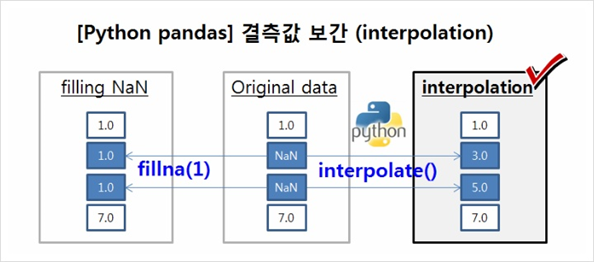

##### SimpleImputer를 이용한 대치
- 단변량 데이터 세트에 대해서 사용한다.
- 평균, 중앙값, 최빈값, 지정값

In [20]:
import pandas as pd
fit = pd.DataFrame([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
data = pd.DataFrame([[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]])
display(fit)
display(data)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
imputer.transform(data)

0    1  2
0   7  2.0  3
1   4  NaN  6
2  10  5.0  9

0    1  2
0   NaN  2.0  3
1   4.0  NaN  6
2  10.0  NaN  9

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  3.5,  9. ]])

##### IterativeImputer - 다변량 대치
- 다변량 데이터 세트에 대해서 사용한다.
- BayesianRidge : 정규화 된 선형 회귀
- DecisionTreeRegressor : 비선형 회귀
- ExtraTreesRegressor : R의 missForest와 유사
- KNeighborsRegressor : 다른 KNN 대치 접근법과 유사

In [68]:
import pandas as pd
# imputer 를 import 하기 위해서 선행 import  필요
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df=pd.read_csv("./heart.csv", na_values=['', 'NA', -1, 9999,172])
m_df = df.select_dtypes(['int64','float64'])
display(m_df.isnull().sum())
imputer = IterativeImputer(random_state=0)
imputer_result = imputer.fit_transform(m_df)
imputer_result

Age              0
RestingBP        2
Cholesterol      2
FastingBS        0
MaxHR           10
Oldpeak          2
HeartDisease     0
dtype: int64

array([[ 40.        , 140.        , 289.        , ..., 156.91960683,
          0.        ,   0.        ],
       [ 49.        , 160.        , 180.        , ..., 156.        ,
          1.        ,   1.        ],
       [ 37.        , 130.        , 283.        , ...,  98.        ,
          0.        ,   0.        ],
       ...,
       [ 57.        , 130.        , 131.        , ..., 115.        ,
          1.2       ,   1.        ],
       [ 57.        , 130.        , 236.        , ..., 174.        ,
          0.        ,   1.        ],
       [ 38.        , 138.        , 175.        , ..., 173.        ,
          0.        ,   0.        ]])

##### KNNImputer
Scikit learn의 KNNImputer 함수를 사용한다. 평균, 중앙값, 최빈값으로 대치하는 경우보다 더 정확할 때가 많다. 반면 전체 데이터셋을 메모리에 올려야 해서 메모리가 많이 필요하고 이상치에 민감하다는 단점이 있다. 대치값을 판단할 기준이 되는 이웃의 개수는 n_neighbors 파라미터로 설정할 수 있다

In [71]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit_transform(m_df)

array([[ 40. , 140. , 289. , ..., 131. ,   0. ,   0. ],
       [ 49. , 160. , 180. , ..., 156. ,   1. ,   1. ],
       [ 37. , 130. , 283. , ...,  98. ,   0. ,   0. ],
       ...,
       [ 57. , 130. , 131. , ..., 115. ,   1.2,   1. ],
       [ 57. , 130. , 236. , ..., 174. ,   0. ,   1. ],
       [ 38. , 138. , 175. , ..., 173. ,   0. ,   0. ]])

##### MICE(Multivariate Imputation by Chained Equation) Imputation

In [ ]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(train.values)

##### <font size="5">Pandas를 활용한 결측치 보간</font>
DataFrame.interpolate(method='linear',   
         axis=0,   
         limit=None,   -- 정수. 보간 할 연속NaN의 최대 수입니다.
         inplace=False,  
         limit_direction='forward',   
         limit_area=None,   
         downcast=None,  
         **kwargs)  
         
df[...].interpolate(method='linear')  
df[...].interpolate(method='nearest')  
df[...].interpolate(method='polynomial', order=2)  
df[...].interpolate(method='polynomial', order=3)  
df[...].interpolate(method='spline', order=2)  
df[...].interpolate(method='spline', order=3  


In [9]:
import pandas as pd

df = pd.DataFrame({'X': [1, 2, 3, None, 3],
                   'Y': [4, None, 8, None, 3]})
print("DataFrame:")
print(df)
'''
default linear 
'''
filled_df = df.interpolate()

print("Interploated DataFrame:")
print(filled_df)

DataFrame:
     X    Y
0  1.0  4.0
1  2.0  NaN
2  3.0  8.0
3  NaN  NaN
4  3.0  3.0
Interploated DataFrame:
     X    Y
0  1.0  4.0
1  2.0  6.0
2  3.0  8.0
3  3.0  5.5
4  3.0  3.0


In [12]:
import pandas as pd

df = pd.DataFrame({'X': [1, 2, 3, None, 3],
                   'Y': [4, None, 8, None, 3]})
print("DataFrame:")
print(df)

filled_df = df.interpolate(method='polynomial', order=2)

print("Interploated DataFrame:")
print(filled_df)

DataFrame:
     X    Y
0  1.0  4.0
1  2.0  NaN
2  3.0  8.0
3  NaN  NaN
4  3.0  3.0
Interploated DataFrame:
          X      Y
0  1.000000  4.000
1  2.000000  7.125
2  3.000000  8.000
3  3.368421  6.625
4  3.000000  3.000


In [13]:
import pandas as pd

df = pd.DataFrame({'X': [1, 2, 3, None, 3],
                   'Y': [4, None, 8, None, 3]})
print("DataFrame:")
print(df)
'''
row 축을 따라 보간 할axis 매개 변수가있는 Pandas DataFrame.interpolate()메서드
여기서는axis=1을 설정하여 행 축을 따라NaN 값을 보간합니다. 
두 번째 행에서 NaN값은 두 번째 행을 따라 선형 보간을 사용하여 대체됩니다.
'''
filled_df = df.interpolate(axis=1)

print("Interploated DataFrame:")
print(filled_df)

DataFrame:
     X    Y
0  1.0  4.0
1  2.0  NaN
2  3.0  8.0
3  NaN  NaN
4  3.0  3.0
Interploated DataFrame:
     X    Y
0  1.0  4.0
1  2.0  2.0
2  3.0  8.0
3  NaN  NaN
4  3.0  3.0


In [15]:
import pandas as pd

df = pd.DataFrame({'X': [1, 2, 3, None, 3],
                   'Y': [4, None, None, None, 3]})
print("DataFrame:")
print(df)
'''
DataFrame.interpolate()메서드의limit 매개 변수는 메서드가 채울 연속NaN 값의 최대 개수를 제한합니다
'''
filled_df = df.interpolate( limit = 1)

print("Interploated DataFrame:")
print(filled_df)

DataFrame:
     X    Y
0  1.0  4.0
1  2.0  NaN
2  3.0  NaN
3  NaN  NaN
4  3.0  3.0
Interploated DataFrame:
     X     Y
0  1.0  4.00
1  2.0  3.75
2  3.0   NaN
3  3.0   NaN
4  3.0  3.00


In [21]:
import pandas as pd

df = pd.DataFrame({'X': [1, 2, 3, None, 3],
                   'Y': [4, None, None, None, 3]})
print("DataFrame:")
print(df)
'''
DataFrame.interpolate()메서드의limit-direction 매개 변수는 값이 보간되는 특정 축을 따라 방향을 제어합니다.
'''
filled_df = df.interpolate(limit_direction ='backward', limit = 1)

print("Interploated DataFrame:")
print(filled_df)

DataFrame:
     X    Y
0  1.0  4.0
1  2.0  NaN
2  3.0  NaN
3  NaN  NaN
4  3.0  3.0
Interploated DataFrame:
     X     Y
0  1.0  4.00
1  2.0   NaN
2  3.0   NaN
3  3.0  3.25
4  3.0  3.00


##### <font size="5">다른 패키지</font>

https://data-newbie.tistory.com/257

<font size="5">Impyute</font>    
API : https://impyute.readthedocs.io/en/master/api/time_series_imputation.html  

pip install impyute

1. Imputation of Cross Sectional Data
- K-Nearest Neighbours
- Multivariate Imputation by Chained Equations
- Expectation Maximization
- Mean Imputation
- Mode Imputation
- Median Imputation
- Random Imputation
2. Imputation of Time Series Data
- Last Observation Carried Forward
- Moving Window
- Autoregressive Integrated Moving Average (WIP)

In [30]:
from impyute.imputation.cs import mode, mean
import numpy as np
data = np.array(['a', 'b', 'b'], dtype=object)
data2 = np.array([5, 3, 5, 2, np.nan])
# mode(data2.reshape(-1,1))
mean(data2.reshape(-1,1))
# data.reshape(-1,1)

# print(help(impyute.imputation.cs ))

array([[5.  ],
       [3.  ],
       [5.  ],
       [2.  ],
       [3.75]])

In [47]:
import pandas as pd
from impyute.imputation.ts import moving_window
df = pd.read_csv('./a10.csv', parse_dates=['date'], index_col='date')
df.loc['1991-08-01'] = np.nan
moving_window(df.values)

data = np.array([[-1.24940, -1.38673, -0.03214945,  0.08255145, -0.007415],
           [ 2.14662,  0.32758 , -0.82601414,  1.78124027,  0.873998],
           [-0.41400, -0.977629,         np.nan, -1.39255344,  1.680435],
           [ 0.40975,  1.067599,  0.29152388, -1.70160145, -0.565226],
           [-0.54592, -1.126187,  2.04004377,  0.16664863, -0.010677]])
moving_window(data)

array([[-1.2494    , -1.38673   , -0.03214945,  0.08255145, -0.007415  ],
       [ 2.14662   ,  0.32758   , -0.82601414,  1.78124027,  0.873998  ],
       [-0.414     , -0.977629  , -0.27593686, -1.39255344,  1.680435  ],
       [ 0.40975   ,  1.067599  ,  0.29152388, -1.70160145, -0.565226  ],
       [-0.54592   , -1.126187  ,  2.04004377,  0.16664863, -0.010677  ]])

In [50]:
pd.DataFrame(data)

0         1         2         3         4
0 -1.24940 -1.386730 -0.032149  0.082551 -0.007415
1  2.14662  0.327580 -0.826014  1.781240  0.873998
2 -0.41400 -0.977629       NaN -1.392553  1.680435
3  0.40975  1.067599  0.291524 -1.701601 -0.565226
4 -0.54592 -1.126187  2.040044  0.166649 -0.010677

In [51]:
pd.DataFrame(moving_window(data))

0         1         2         3         4
0 -1.24940 -1.386730 -0.032149  0.082551 -0.007415
1  2.14662  0.327580 -0.826014  1.781240  0.873998
2 -0.41400 -0.977629 -0.275937 -1.392553  1.680435
3  0.40975  1.067599  0.291524 -1.701601 -0.565226
4 -0.54592 -1.126187  2.040044  0.166649 -0.010677

categorical 변수 가장 빈도수 많은 것으로 대체할 때

In [25]:
#pip install sklearn-pandas

"""
수동으로 하였을경우 
func_fillna = lambda x : x.fillna(x.mode()[0])
train['Job2'] = train.groupby('Marital')['Job'].apply(func_fillna)
train[train.Job.isnull()]
"""

import numpy as np
from sklearn_pandas import CategoricalImputer
data = np.array(['a', 'b', 'b', np.nan], dtype=object)

imputer = CategoricalImputer()
imputer.fit_transform(data)

array(['a', 'b', 'b', 'b'], dtype=object)

- 시계열데이터의 값에 선형으로 비례하는 방식으로 결측값 보간  
  (interpolate TimeSeries missing values linearly) : ts.interpolate()

In [8]:
datestrs = ['12/1/2016', '12/03/2016', '12/04/2016', '12/10/2016']
dates = pd.to_datetime(datestrs)
ts = pd.Series([1, np.nan, np.nan, 10], index=dates)
print(ts)
#선형 보간법
ts_intp_linear = ts.interpolate()
ts_intp_linear


2016-12-01     1.0
2016-12-03     NaN
2016-12-04     NaN
2016-12-10    10.0
dtype: float64


2016-12-01     1.0
2016-12-03     4.0
2016-12-04     7.0
2016-12-10    10.0
dtype: float64

- 시계열 날짜 index를 기준으로 결측값 보간

In [11]:
datestrs = ['12/1/2016', '12/05/2016', '12/06/2016', '12/10/2016']
dates = pd.to_datetime(datestrs)
ts = pd.Series([1, np.nan, np.nan, 10], index=dates)
print(ts)
ts_intp_time = ts_intp_time = ts.interpolate(method='time')
ts_intp_time


2016-12-01     1.0
2016-12-05     NaN
2016-12-06     NaN
2016-12-10    10.0
dtype: float64


2016-12-01     1.0
2016-12-05     5.0
2016-12-06     6.0
2016-12-10    10.0
dtype: float64

- DataFrame 값에 선형으로 비례하는 방식으로 결측값 보간

In [17]:
df = pd.DataFrame({'C1': [1, 2, np.nan, np.nan, 5],'C2': [6, 8, 10, np.nan, 20]})
print(df)
# the same with : df.interpolate(method='values') = df.interpolate()
df_intp_values = df.interpolate(method='values')
df_intp_values

    C1    C2
0  1.0   6.0
1  2.0   8.0
2  NaN  10.0
3  NaN   NaN
4  5.0  20.0


C1    C2
0  1.0   6.0
1  2.0   8.0
2  3.0  10.0
3  4.0  15.0
4  5.0  20.0

In [51]:
df = pd.DataFrame({'ID':['AA1','AA2','AA3','AA4','AA5','BB1','BB2','BB3','BB4','BB5','CC1','CC2','CC3','CC4','CC5'
                    ,'DD1','DD2','DD3','DD4','DD5'],
              'A_col':[12.00023,11.32,np.nan,12.0132,13.212,12.0123,10.2,np.nan,12.02937,10.323,12.00384,12.03047,
                       np.nan,12.0304,13.234,12.00304,12.00202,np.nan,14.2623,9.273]
             })

def interpolated(df):
    temp=[]
    for i in df['ID'].str[:2].unique():
        temp.append(df[df['ID'].str.contains(i)].interpolate())
    new_df=pd.concat(temp,axis=0)
    return new_df

interpolated(df).head()

ID     A_col
0  AA1  12.00023
1  AA2  11.32000
2  AA3  11.66660
3  AA4  12.01320
4  AA5  13.21200

결측치 보간법 : 다항식 보간

In [50]:
df.interpolate(method='polynomial', order = 2).head()

ID      A_col
0  AA1  12.000230
1  AA2  11.320000
2  AA3  11.265979
3  AA4  12.013200
4  AA5  13.212000

#### 시계열 결측값 대치 

참고 사이트 : https://rfriend.tistory.com/682

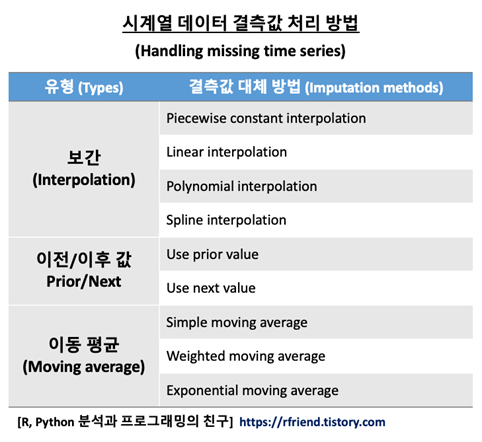

- Python scipy 모듈을 이용해서 시계열 데이터 결측값을 보간(Interpolation)하는 방법  
xnew 값은 보간 이전의 데이터 x의 최소값보다 작은 값이나, 최대값보다 큰 값을 넣게 되면 오류가 난다

출처: https://besixdouze.net/33 [Bésixdouze]

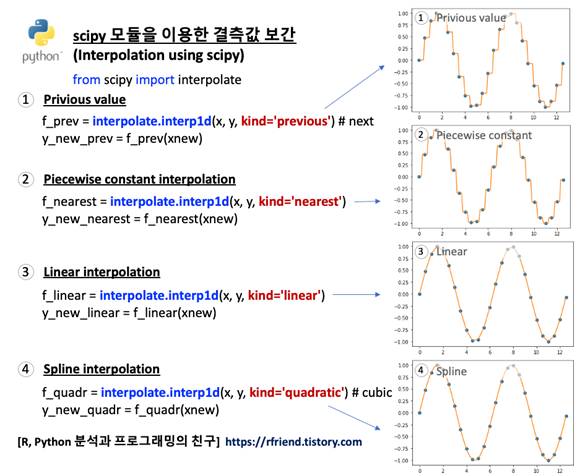


In [6]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

## generating the original data with missing values
x = np.arange(0, 4*np.pi, 0.5)
y = np.sin(x)

plt.plot(x, y, "o")
plt.title("original data with missing values")
plt.show()

##### 1. 이전 값/ 다음 값을 이용하여 결측값 채우기 (Imputation using the previous/next values)
데이터 포인트 사이의 값을 채우는 가장 간단한 방법은 이전 값(previous value) 나 또는 다음 값(next value)을 이용하는 것입니다. 함수를 추정하는 절차가 필요없으므로 연산 상 부담이 적지만, 데이터 추정 오차는 단점이 될 수 있습니다. 

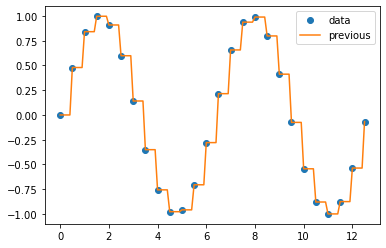

In [8]:
xnew = np.arange(0, 4*np.pi, 0.1)
f_prev = interpolate.interp1d(x, y, kind='previous') # next
y_new_prev = f_prev(xnew) 
plt.plot(x, y, "o", xnew, y_new_prev, '-') 
plt.legend(['data','previous'], loc='best')
plt.show()

##### 2.최근접 이웃 보간 Piecewise Constant Interpolation
위 1번의 이전 값 또는 다음 값을 이용한 사이값 채우기를 합쳐놓은 방법입니다. Piecewise Constant Interpolation은 특정 데이터 포인트를 기준으로 가장 가까운 값 (nearest value) 을 가져다가 사이값을 보간합니다. ("최근접 이웃 보간"이라고도 함)

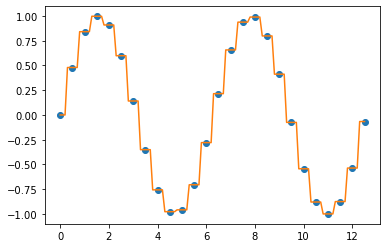

In [40]:
## Piecewise Constant Interpolation
f_nearest = interpolate.interp1d(
    x, y, kind='nearest')

y_new_nearest = f_nearest(xnew)

plt.plot(x, y, "o", xnew, y_new_nearest)
plt.show()

##### 3.선형 보간법 Linear Interpolation
선형 보간법은 가장 쉬운 보간법 중의 하나로서, 연산이 빠르고 쉽습니다. 하지만 추정값이 정확한 편은 아니며, 데이터 포인트 Xk 에서 미분 가능하지 않다는 단점도 있습니다.  

일반적으로, 선형 보간법은 두 개의 데이터 포인트, 가령 (Xa, Ya)와 (Xb, Yb), 를 사용해서 다음의 공식으로 두 값 사이의 값을 보간합니다. 

Y = Ya + (Yb - Ya) * (X - Xa) / (Xb- Xa)    at the point (x, y)

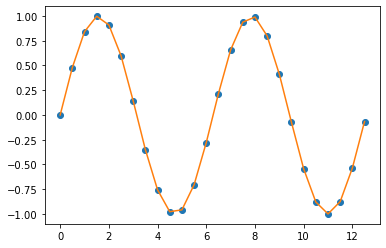

In [42]:
## Linear Interpolation
f_linear = interpolate.interp1d(
    x, y, kind='linear')

y_new_linear = f_linear(xnew)

plt.plot(x, y, "o", xnew, y_new_linear, '-')
plt.show()

##### 4.다항식 보간법(Polynomial Interpolation)
다항식 보간법(Polynomial Interpolation)은 선형 보간법을 일반화(generalization of linear interpolation)한 것입니다. 선형 보간법에서는 선형 함수를 사용했다면, 다항식 보간법에서는 더 높은 차수의 다항식 함수를 사용해서 보간하는 것으로 대체한 것입니다. 

일반적으로, 만약 우리가 n개의 데이터 포인트를 가지고 있다면 모든 데이터 포인트를 통과하는 n-1 차수의 다차항 함수가 존재합니다. 보간 오차는 데이터 포인트 간의 거리의 n 차승에 비례(interpolation error is proportional to the distance between the data points to the power n)하며, 다차항 함수는 미분가능합니다. 따라서 선형 보간법의 대부분의 문제를 다항식 보간법은 극복합니다. 하지만 다항식 보간법은 선형 보간법에 비해 복잡하고 연산에 많은 비용이 소요됩니다. 그리고 끝 점(end point) 에서는 진동하면서 변동성이 큰 값을 추정하는 문제가 있습니다  

스플라인 보간법(Spline Interpolation)은 다항식 보간법의 장점은 살리고 단점은 피해간 보간법입니다. 스플라인 보간법은 다항식 보간법처럼 선형 보간법보다 보간 오차가 더 작은 반면에, 고차항의 다항식 보간법보다는 보간 함수가 부드럽고 평가하기가 쉽습니다

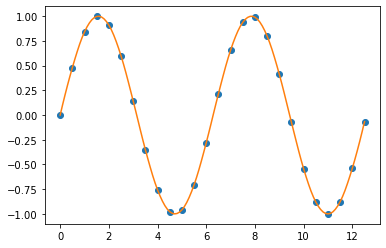

In [43]:
## Spline Interpolation
f_quadr = interpolate.interp1d(
    x, y, kind='quadratic') # cubic

y_new_quadr = f_quadr(xnew)

plt.plot(x, y, "o", xnew, y_new_quadr)
plt.show()

In [141]:
from scipy.interpolate import interp1d
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
df_orig = pd.read_csv('./a10.csv', parse_dates=['date'], index_col='date').head(204)
df = pd.read_csv('./a10_missings.csv', parse_dates=['date'], index_col='date')

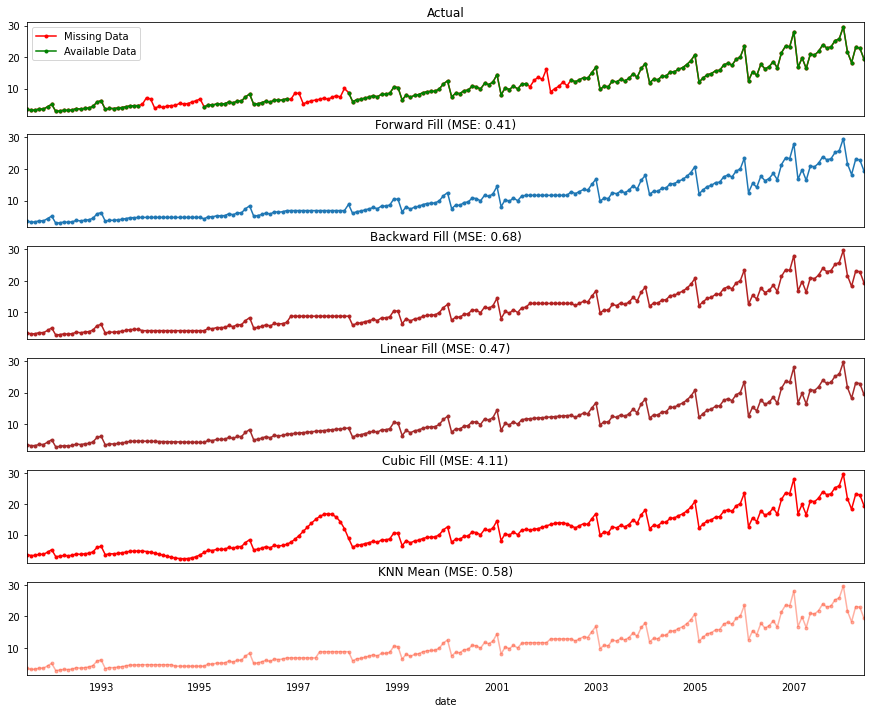

In [142]:
fig, axes = plt.subplots(6, 1, sharex=True, figsize=(15, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
# bfill 결측값 위에값
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
# bfill 결측값 아래값
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
#삼차보간법은 3차(cubic) 함수를 활용합니다. 삼차보간법은 우리가 알고 있는 두 점 a, b가 삼차함수 그래프 위에 있다고 가정합니다
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

## 6. Knn Interpolation --------------------
f3 = interp1d(df_nona['rownum'], df_nona['value'], kind='nearest')
df['knn_mean'] = f3(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")


plt.show()

In [161]:
# df[df.isnull().any(axis=1)]
# df
df_test= df_nona['value'].resample('M').first().fillna(0)

In [174]:
# null_df = df[df.isnull().any(axis=1)]


Timestamp('2008-06-30 00:00:00', freq='M')

In [175]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_test, (0, 0, 1))
rfit = model.fit()
rfit.predict(start = df_test.index[-1], end = df_test.index[-1], typ = 'levels')

date
2008-06-30    14.67797
Freq: M, dtype: float64

#### 예측 모델 (Prediction model)
- 예측 기법을 사용한 결측치 추정은 결측치들의 특성이 패턴을 가진다고 가정하고 진행하게 된다.  
- 결측값이 없는 컬럼들로 구성된 dataset으로 결측값이 있는 컬럼을 예측한다.  
- 회귀 분석 기술을 활용하거나 SVM과 같은 기계 학습 방법 또는 이러한 결측치를 채우는 데이터 마이닝 방법과 같은 다양한 통계 방법이 있다.
- 결측값을 회귀분석을 이용해서 추정하는방법 참고        

### 결측치 시각화
missingno 이용한 결측값 시각화

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

titanic = pd.read_csv('../Data/타이타닉/train.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


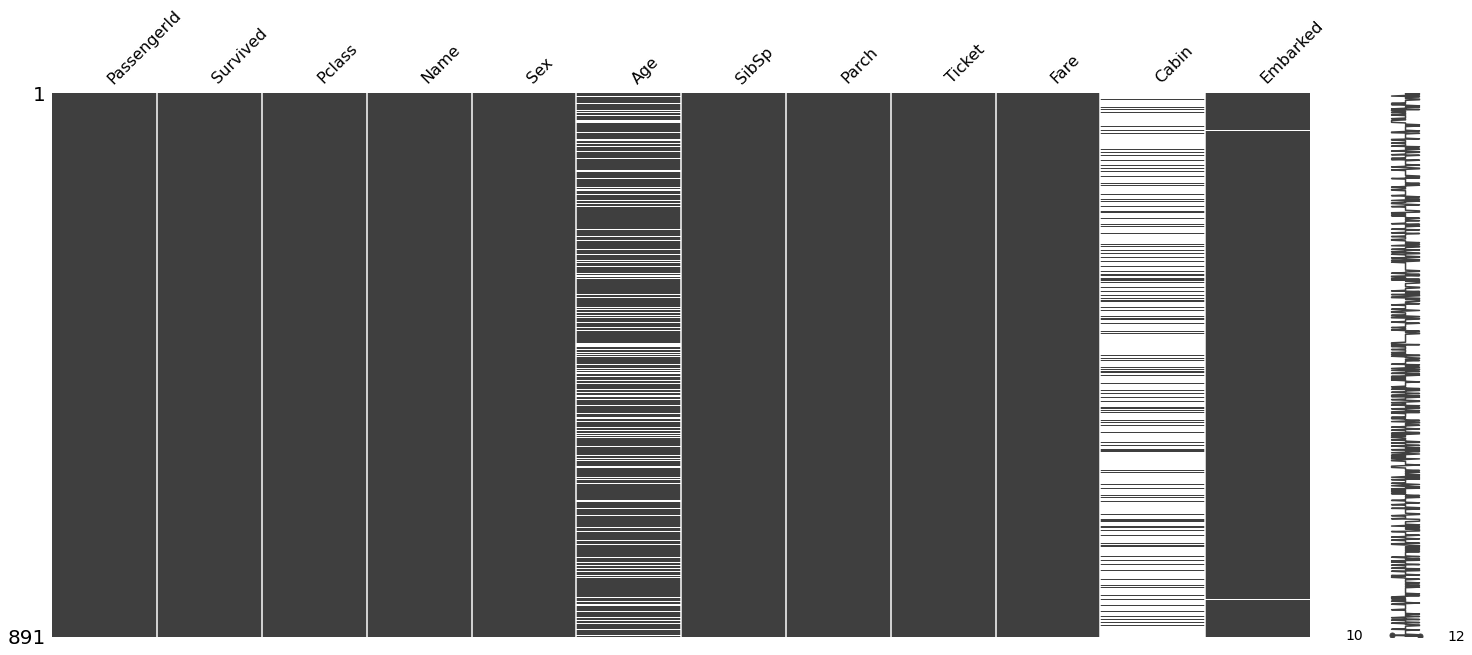

In [3]:
msno.matrix(titanic)
plt.show()

피쳐  Age , Cabin, Embarked 결측값이 있다는 것을 확인 할 수 있음.

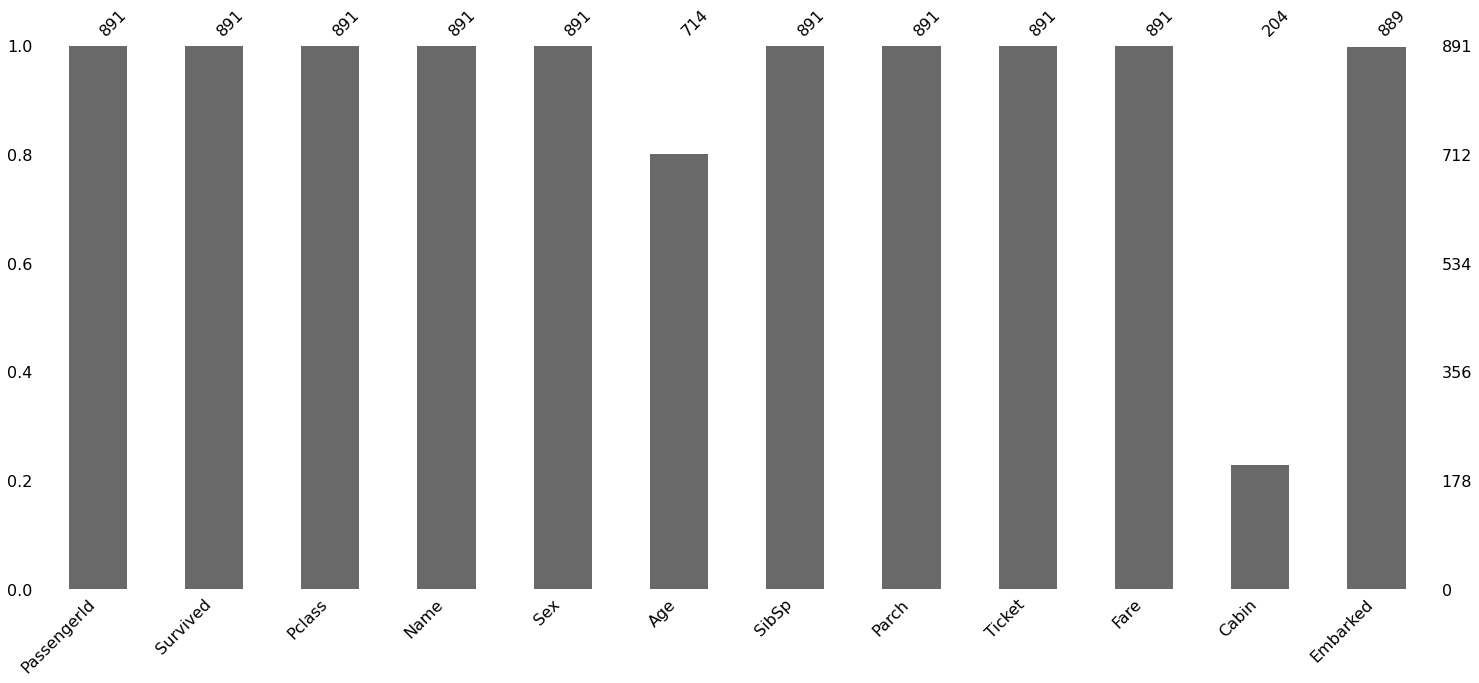

In [4]:
msno.bar(titanic)
plt.show()

## 4.이상값(특이값)
참고 사이트 : https://lovelydiary.tistory.com/409

이상치는 데이터를 만드는 사람의 실수에 의해서 발생할 수도 있고, 데이터를 생성하는 시스템에 의하여 발생할 수도 있다. 이상치는 회귀분석에서 양날의 검이라고 할 수 있는데.. 이상치로 인하여 모형의 해석(회귀 계수의 해석)이 정확하지 않게 될 수 있지만 중요한 정보(시스템의 고장, 새로운 연관성의 발견 등)을 제공 하기 때문이다. 그렇지만 이상치가 항상 의미없는 값이라고는 할 수 없으므로, 그 데이터에 대한 지식을 가지고 있는 전문가가 이상치에 대해 검토하는 것이 바람직하다
***
이상치란 다른 데이터보다 아주 작은 값이나 아주 큰 값을 말한다 데이터를 분석할 때 이상치는 의사결정에 영향을 미칠 수 있다 모형 구축에 있어 이상치는 그 빈도에 비해 아주 큰 영향력을 가지므로  정확한 모수(parameter) 추정에 어려움을 준다
또한 이상치 중에서도 모형 여기서는 회귀 계수 값의 변화를 크게 만드는 것이 있고 아닌것이 있다. 이때 이상치 중에서 회귀 계수 값의 변화를 크게 만드는 데이터를 영향점(Influential data)이라고 한다.  


### 이상값 찾는 방법
자료를 찾아 봤는데 이상값/이상치를 찾는 방법이 여러가지가 있고, 또한 데이터가 일변량이냐 다변량이냐, 지도학습이냐 비지도 학습이냐에 따라서 다양하다. 
이부분은 내가 생각하여 정리 한것이다. 

#### 단변량이냐, 다변량에 따른 이상값 찾는 방법
- Z-Score를 이용한 방법  
Z score = (x -mean) / std. deviation
- ESD(Extreme Studentized Deviation): 평균으로부터 3 표준편차 떨어진 값들
- 일반 데이터의 범위를 벗어나는 경우 1: 기하평균-2.5표준편차 < data < 기하평균 + 2.5표준편차
- 일반 데이터의 범위를 벗어나는 경우 2: Q1-1.5*(IQR; Q3-Q1) < data < Q3+1.5*(IQR; Q3-Q1)
- Boxplot을 통해 이상값으로 o 표기되는 경우

- externally studentized residual(외면 스튜던트화 잔차)  
이상치(Outlier)는 주어진 회귀 모델에 의해 잘 설명되지 않는 데이터를 뜻한다. 이상치 검출에서는 잔차, 특히 외면 스튜던트화 잔차(externally studentized residual)를 사용한다. 스튜던트화 잔차(studentized residual)는 잔차를 표준편차로 나눈 값이다. 일반적으로 표준편차는 데이터 전체에서 구한다. 그런데 i번째 데이터가 이상치인지 확인하면서 i번째 데이터를 포함해 표준편차를 구하는 것은 적절하지 않을 수 있다. 따라서 외면 스튜던트화 잔차는 i번째 스튜던트화 잔차를 구할 때 i를 제외하여 표준편차를 구한다. 반면 전체 데이터에 대해 표준편차를 구하는 경우를 내면 스튜던트화 잔차(internally studentized residual)라 한다
- One Class SVM(이하 OC-SVM)
데이터들을 N차원의 좌표축으로 뿌린 후 , 원점과의 거리를 기준으로 선(Hyper Plane)을 그어 Classification하는 것입니다.
여기서 유의하셔야할점은, 일반 SVM과는 분명한 차이를 가지고 있다는 점입니다.Binary-Classification에 많이 쓰이는 SVM은 각 데이터들 속 Support Vector 간의 Margin을 기준으로 Hyper plane을 나누지만, OCSVM은 원점을 기준으로하기에, 조건에 따라 데이터가 아무리 많아도 Class가 1개일 수 있습니다.  
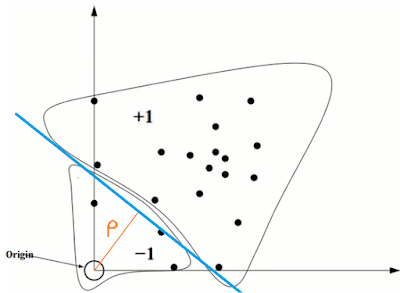  
위 그림에서 파란색 분류경계면이 (+1) normal data들을 구분하는 것을 확인할 수 있다.

- DBSCAN 클러스터링을 통해 타겟값이 -1이 되는 경우  
Machine Learning을 이용한 Outlier 분류이다. 알고리즘 특성상 Outlier에 대한 데이터는 클러스터링 처리를 안해줘서. 클러스터링 결과가 없는건 Outlier로 판단하면된다. 단점은 연산량이 많아서 큰 데이터셋에는 매우 오랜시간이 걸린다.  
- Isolation forest을 이용한 이상탐지  
Isolation Forest는 여러 개의 의사결정나무 (decision tree)를 종합한 앙상블 기반의 이상탐지 기법으로 의사결정나무를 지속적으로 분기시키면서 모든 데이터 관측치의 고립 정도 여부에 따라 이상치를 판별하는 방법입니다. 직관적으로 비정상 데이터라면 의사결정나무의 루트에서 가까운 깊이에서 고립될 것이고 정상 데이터라면 루트에서 먼 깊이에서 고립될 것입니다. 즉, 특정한 샘플이 고립되는 leaf 노드 (의사결정나무의 끝) 까지의 거리를 outlier score로 정의하고 루트 노드까지의 평균 거리가 짧을 수록 outlier score가 높아지는 원리입니다.  
Unsupervised Anomaly Detection : Isolation Forest는 데이터에서 이상치를 탐지하기 위한 방법론입니다.  
Random Forest와 비슷하게 작동하며, 여러개의 iTree로 구성됩니다.  
고차원 데이터에서도 작동할 수 있는 강점이 있습니다.  Score는 0 ~ 1 사이에 분포되며, 1에 가까울 수록 이상치일 가능성이 크고 0.5 이하이면 정상데이터로 판단할 수 있습니다.


***
이렇게 구분 짓는것도 있고.. 또는 지도학습처럼 label 이 있는지에 따라서 이상값을 찾는 방법도 있다.. 즉 단변량에 대한 이상값을 찾는 방법, 다변량에 대한 이상값을 찾는방법, 지도학습이냐, 비지도 학습이냐.. 구분
***
#### label 유무에 따른 분류
1. Supervised Anomaly Detection  
주어진 학습 데이터 셋에 정상 sample과 비정상 sample의 Data와 Label이 모두 존재하는 경우 Supervised Learning 방식이기 때문에 Supervised Anomaly Detection이라 부릅니다. Supervised Learning 방식은 다른 방법 대비 정확도가 높은 특징이 있습니다. 그래서 높은 정확도를 요구로 하는 경우에 주로 사용되며, 비정상 sample을 다양하게 보유할수록 더 높은 성능을 달성할 수 있습니다.  
하지만 Anomaly Detection이 적용되는 일반적인 산업 현장에서는 정상 sample보다 비정상 sample의 발생 빈도가 현저히 적기 때문에 Class-Imbalance(불균형) 문제를 자주 겪게 됩니다. 이러한 문제를 해결하기 위해 Data Augmentation(증강), Loss function 재설계, Batch Sampling 등 다양한 연구가 수행되고 있습니다.  
장점: 양/불 판정 정확도가 높다.  
단점: 비정상 sample을 취득하는데 시간과 비용이 많이 든다. Class-Imbalance 문제를 해결해야 한다.

2. Semi-supervised (One-Class) Anomaly Detection  
Supervised Anomaly Detection 방식의 가장 큰 문제는 비정상 sample을 확보하는데 많은 시간과 비용이 든다는 것입니다. 제조업의 경우를 예로 들면, 수백만 장의 정상 sample이 취득되는 동안 단 1~2장의 비정상 sample이 취득되는 상황이 종종 발생합니다.  
제조업에서 Supervised Learning 방식으로 학습하기 위해 각 class 당 최소 100장의 이미지가 필요하다고 가정하면, 실제로는 sample 1억 장을 모아야 100장 정도의 비정상 sample을 확보할 수 있습니다. 이런 상황에서는 데이터 셋을 확보하는데 굉장히 오랜 시간이 소요되겠죠?  
이처럼 Class-Imbalance가 매우 심한 경우 정상 sample만 이용해서 모델을 학습하기도 하는데, 이 방식을 One-Class Classification(혹은 Semi-supervised Learning)이라 합니다. 이 방법론의 핵심 아이디어는 정상 sample들을 둘러싸는 discriminative boundary를 설정하고, 이 boundary를 최대한 좁혀 boundary 밖에 있는 sample들을 모두 비정상으로 간주하는 것입니다. One-Class SVM 이 One-Class Classification을 사용하는 대표적인 방법론으로 잘 알려져 있으며, 이 아이디어에서 확장해 Deep Learning을 기반으로 One-Class Classification 방법론을 사용하는 Deep SVDD 논문이 잘 알려져 있습니다.

3. Unsupervised Anomaly Detection  
위에서 설명드린 One-Class(Semi-supervised) Anomaly Detection 방식은 정상 sample이 필요합니다. 수많은 데이터 중에 어떤 것이 정상 sample 인지 알기 위해서는 반드시 정상 sample에 대한 Label을 확보하는 과정이 필요합니다. 이러한 점에 주목해, 대부분의 데이터가 정상 sample이라는 가정을 하여 Label 취득 없이 학습을 시키는 Unsupervised Anomaly Detection 방법론도 연구가 이뤄지고 있습니다.  
가장 단순하게는 주어진 데이터에 대해 Principal Component Analysis(PCA, 주성분 분석)를 이용하여 차원을 축소하고 복원을 하는 과정을 통해 비정상 sample을 검출할 수 있습니다. , Neural Network 기반으로는 대표적으로 Autoencoder 기반의 방법론이 주로 사용되고 있습니다. Autoencoder는 입력을 code 혹은 latent variable로 압축하는 Encoding과, 이를 다시 원본과 가깝게 복원해내는 Decoding 과정으로 진행이 되며 이를 통해 데이터의 중요한 정보들만 압축적으로 배울 수 있다는 점에서 데이터의 주성분을 배울 수 있는 PCA와 유사한 동작을 한다고 볼 수 있습니다.

#### 이상값 찾는 방법 예제

##### 고전적인 Z-Score 이용한 이상값 찾기
Z-score는 통계에서 중요한 개념이고, 다른 이름으로 Standard-score라고도 한다. 이 방법은 변수에 가우스 분포가 취하고 있다는 가정으로 시작하고, 관측치가 평균에서 벗어난 표준 편차의 수를 나타낸다. 포인트 그룹의 평균 및 표준 편차와의 관계 측면에서 데이터 포인트를 설명하는 방법이라고 볼 수 있다. 

In [1]:
import numpy as np  
data = [1, 3, 3, 2, 4, 1, 1, 12, 1, 2, 3, 2, 1, 2, 1]
mean = np.mean(data)
std = np.std(data)
print('데이터의 평균은', mean)
print('데이터의 표준 편차는', std)

threshold = 3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('데이터셋 내의 이상값은', outlier) 

데이터의 평균은 2.6
데이터의 표준 편차는 2.6783079235467557
데이터셋 내의 이상값은 [12]


##### LOF(Local Outlier Factor)를 이용한 이상값 찾기
참고사이트 : https://yjjo.tistory.com/45  
LOF는 각각의 관측치가 데이터 안에서 얼마나 벗어나 있는가에 대한 정도(이상치 정도)를 나타냅니다. LOF의 가장 중요한 특징은 모든 데이터를 전체적으로 고려하는 것이 아니라, 해당 관측치의 주변 데이터(neighbor)를 이용하여 국소적(local) 관점으로 이상치 정도를 파악하는 것입니다. 또한, 주변 데이터를 몇개까지 고려할 것인가를 나타내는 k라는 하이퍼-파라미터(hyper-parameter)만 결정하면 되는 장점이 있습니다. 밑의 경우에 대해 기존 density based 방법은 o1은 이상치로 잘 탐지하겠지만 o2는 탐지를 못할 가능성이 높겠죠. 따라서 LOF는 지역적인 밀집도를 고려하여 이상치를 판단합니다.   
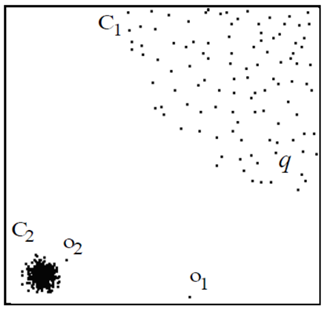


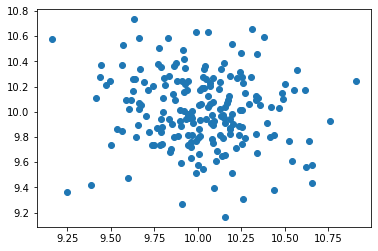

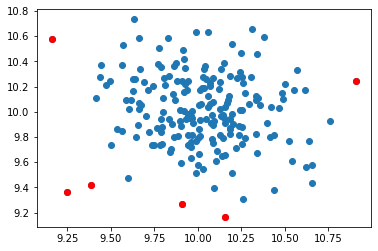

LocalOutlierFactor()
-1.8191482960907037


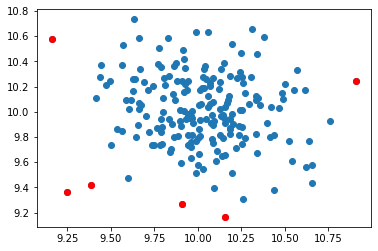

In [24]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

random.seed(1)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(10,10))

plt.scatter(x[:,0], x[:,1])
plt.show()

lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)
 
y_pred = lof.fit_predict(x)

lofs_index=where(y_pred==-1)
values = x[lofs_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

model = LocalOutlierFactor(n_neighbors=20) 
print(model)  
model.fit_predict(x) 
 
lof = model.negative_outlier_factor_
thresh = quantile(lof, .03)
print(thresh) 
 
index = where(lof<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

##### Elliptical Envelope를 이용한 이상값 찾기
참고사이트 : https://www.datatechnotes.com/2020/04/anomaly-detection-with-elliptical-envelope-in-python.html

일반적으로 outlier detection은 알려진 일정한 분포(gaussian distiributed)로부터 정상적인 데이터를 추정한다.
일반적으로  data의 shape를 정의하면, 이 shape를 벗어난 데이터를 사용해 추정 할 수 있다.
Covariance.EllipticEnvelolpe를 사용하여 공분산 추정을 하고,  중심 데이터들을 타원형에 fit 한다. 그리고 central mode를 벗어난 데이터는 제외한다. 예를들어 inlier data는 Gaussian distributed라고 가정하고,  inlier location과 공분산을 outlier에 영향을 받지 않는 견고한 방법으로 추정한다. Mahalanobis distance가 이 추정 방법으로 사용된다. 
간단하게 설명하면, 정규 분포를 이용하여 데이터의 확률을 구하고 너무 확률이 낮은 것은 outlier로 간주하여 삭제하는 것입니다.


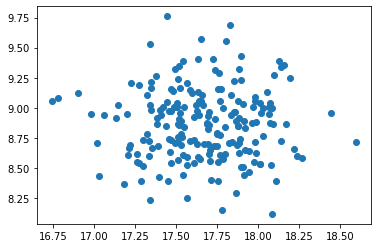

EllipticEnvelope(contamination=0.01)


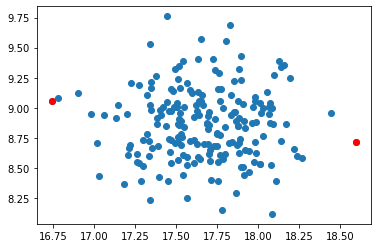

EllipticEnvelope()
-11.049699894144766


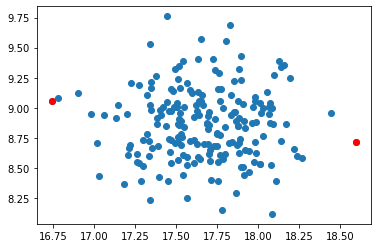

In [32]:
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

random.seed(12)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(20, 5))

plt.scatter(x[:,0], x[:,1])
plt.show() 


# EllipticEnvelope 을 이용하여 outlier를 검출하기 위한 객체를 생성합니다.
# contamination의 비율을 기준으로 비율보다 낮은 값을 검출합니다.    
elenv = EllipticEnvelope(contamination=.01)
print(elenv)

pred = elenv.fit_predict(x)
anom_index=where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()
 
elenv = EllipticEnvelope()
print(elenv)

elenv.fit(x)
scores = elenv.score_samples(x)
# print(scores)
thresh = quantile(scores, .01)
print(thresh) 
 
index = where(scores <= thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show() 

##### Gaussian Mixture를 이용한 이상값 찾기


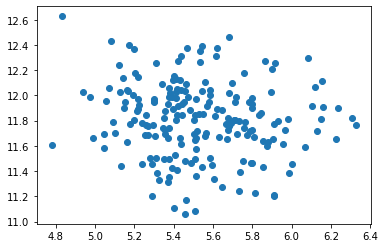

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture()
-2.4998195352804533


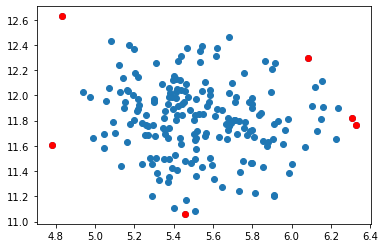

In [33]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

random.seed(4)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(20, 5))

plt.scatter(x[:,0], x[:,1])
plt.show()

gausMix = GaussianMixture().fit(x)
print(gausMix)

scores = gausMix.score_samples(x)

thresh = quantile(scores, .03)
print(thresh)
 
index = where(scores <= thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

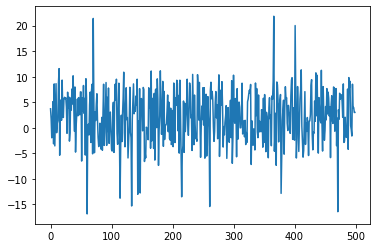

KernelDensity()
-4.071068385863522


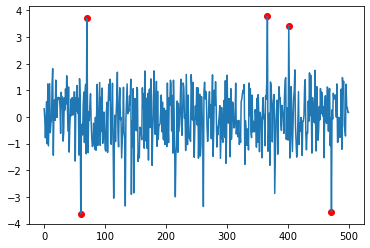

KernelDensity()
-3.3380938690001756


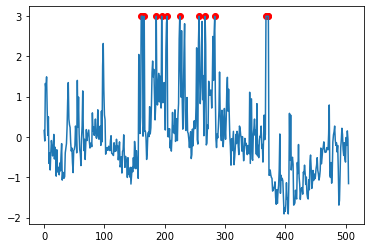

##### Kernel Density를 이용한 이상값 찾기

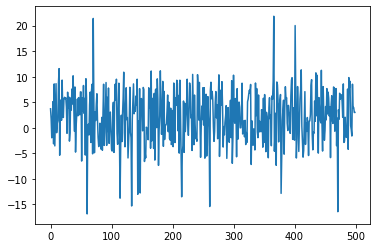

KernelDensity()
-4.071068385863522


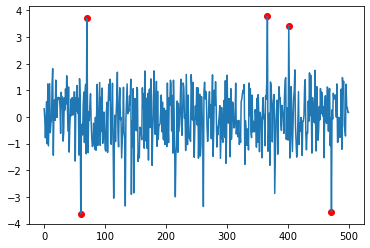

KernelDensity()
-3.3380938690001756


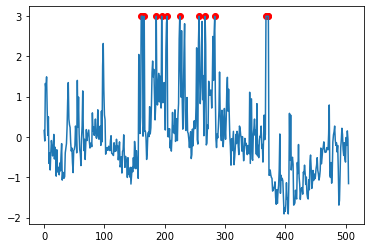

In [35]:
from sklearn.neighbors import KernelDensity
from numpy import where, random, array, quantile
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

random.seed(124)
def makeData(N):
    x = []
    for i in range(N):
        a = i/1000 + random.uniform(-3, 2)
        r = random.uniform(-5, 10)
        if(r >= 9.8):
            r = r + 10
        elif(r<(-4.8)):
            r = r +(-10)        
        x.append([a + r])   
    return array(x)

n = 500
x= makeData(n)

x_ax = range(n)
plt.plot(x_ax, x)
plt.show()

x = scale(x)

kernaldens = KernelDensity().fit(x)
print(kernaldens)

scores = kernaldens.score_samples(x)
thresh = quantile(scores, .01)
print(thresh)

index = where(scores <= thresh)
values = x[index]

plt.plot(x_ax, x)
plt.scatter(index,values, color='r')
plt.show()

boston = load_boston()
y = boston.target

y = y.reshape(y.shape[0],1)
y = scale(y)

kernaldens = KernelDensity().fit(y)
print(kernaldens)

scores = kernaldens.score_samples(y)
thresh = quantile(scores, .01)
print(thresh)
index = where(scores <= thresh)
values = y[index]

x_ax = range(y.shape[0])
plt.plot(x_ax, y)
plt.scatter(index,values, color='r')
plt.show()

##### externally studentized residual(외면 스튜던트화 잔차) 이용한 이상값 찾기
아래 결과 Bonferonni의 유의확률이 0.05라는 유의수준보다 크므로 이상치 하나도 없다는 결론을 내린다.

In [63]:
#import necessary packages and functions
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
# import warnings.filterwarnings

#create dataset
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19]})

#fit simple linear regression model
model = ols('rating ~ points', data=df).fit()
print(model.summary())

#calculate studentized residuals
stud_res = model.outlier_test()

#display studentized residuals
print(stud_res)

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     11.61
Date:                Mon, 24 Jan 2022   Prob (F-statistic):            0.00927
Time:                        13:41:44   Log-Likelihood:                -27.252
No. Observations:                  10   AIC:                             58.50
Df Residuals:                       8   BIC:                             59.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.0282      5.235     12.994      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##### One Class SVM(이하 OC-SVM)을 이용한 탐지
Novelty detection  
: training data가 outlier에 의해서 오염되지 않은 상태에서 새로운 관측치로부터 이상치를 확인 하는 것

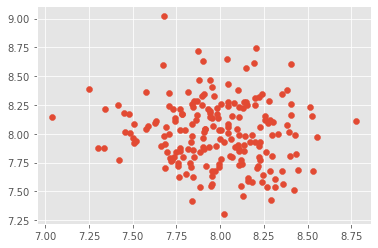

OneClassSVM(gamma=0.001, nu=0.03)


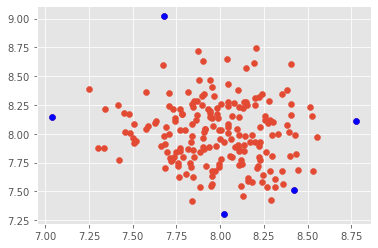

OneClassSVM(gamma=0.001, nu=0.02)
3.994389673293594


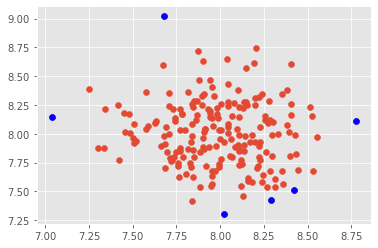

In [95]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

random.seed(13)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(8, 8))

plt.scatter(x[:,0], x[:,1])
plt.show()

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
print(svm)

svm.fit(x)
pred = svm.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='b')
plt.show()

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.02)
print(svm)

pred = svm.fit_predict(x)
scores = svm.score_samples(x)

thresh = quantile(scores, 0.03)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='b')
plt.show()

##### Isolation forest을 이용한 이상탐지
파이썬에서는 sklearn.ensemble 모듈의 IsolationForest 함수가 Isolation Forest 알고리즘을 지원합니다.  
n_estimators : 나무의 개수로 디폴트는 100 입니다.  
max_samples : Algorithm 1의 Φ 로 정수일 경우 지정한 정수 개수만큼 각 나무 별로 데이터를 샘플링합니다. 0과 1사이의 실수일 경우 전체 데이터 개수에 실수를 곱한 만큼의 데이터를 사용하며, 따로 지정하지 않았을 경우 전체 데이터 개수와 256 중 작은 수를 사용합니다.  
contamination : 전체 데이터에서 이상치의 비율입니다. 이 비율에 따라서 이상치로 판단하기 위한 score의 threshold를 정의합니다.  
max_features :각 나무를 훈련할 때, 사용할 feature의 개수로 디폴트는 1로 선언되어 있습니다. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
%matplotlib inline

salary = pd.read_csv('./Salaries.csv')
salary = salary[salary['JobTitle'].isin(['Transit Operator','Special Nurse','Special Nurse','Registered Nurse',
                        'Public Svc Aide-Public Works','Police Officer 3','Custodian','Firefighter',
                        'Recreation Leader','Patient Care Assistant'])][['JobTitle','TotalPay']]
                
df = salary.copy()
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


JobTitle   TotalPay
36199  Firefighter  290076.13
36221  Firefighter  267951.41
36238  Firefighter  259740.36
36270  Firefighter  245399.19
36272  Firefighter  246369.02

In [3]:
df['JobTitle'].value_counts()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64

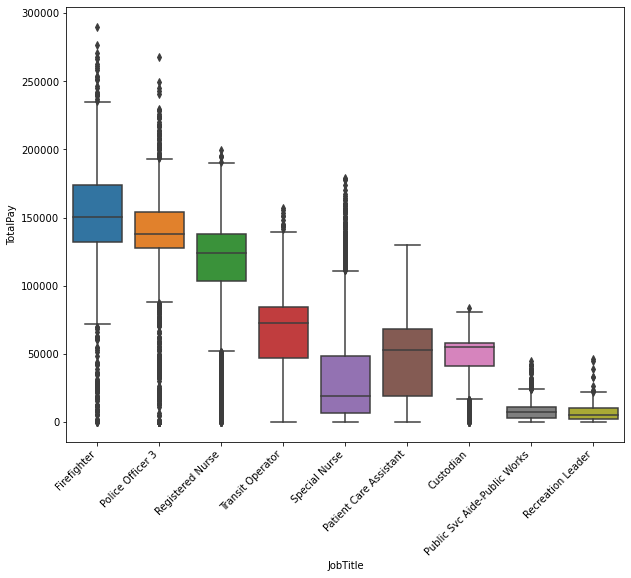

In [4]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45, horizontalalignment='right')
sns.boxplot(x='JobTitle', y='TotalPay', data=df)
plt.show()

위 시각화를 통해 미국에서는 소방관(Firefighter)의 연봉이 높다는 것과 연봉의 분포가 일정하지 않다는 것을 알 수 있다.
기계학습을 위해 위의 데이터를 LabelEncoder를 통해 전처리 해줘야한다.

In [5]:
from sklearn.preprocessing import LabelEncoder
job_encode = LabelEncoder()
salary['JobTitle'] = job_encode.fit_transform(salary['JobTitle'])
salary[['JobTitle','TotalPay']].tail()

JobTitle  TotalPay
148621         8     15.35
148625         6      6.00
148639         0      0.00
148648         0      0.00
148649         0      0.00

In [9]:
model=IsolationForest(n_estimators=100, max_samples='auto', n_jobs=-1,
                      max_features=2, contamination=0.01)
model.fit(salary.to_numpy())

# 데이터프레임에 평가 점수(score)와 이상(anomaly) 판단 여부에 대한 값을 추가한다.
score = model.decision_function(salary.to_numpy())
# score_samples 절대값으로 0.5이상이면 이상치로 판단하는것으로 보임
df['scores2'] = model.score_samples(salary.to_numpy())
anomaly = model.predict(salary.to_numpy())
df['scores']= score
df['anomaly']= anomaly
anomaly_data = df.loc[df['anomaly']==-1] # 이상값은 -1으로 나타낸다.
anomaly_data

JobTitle   TotalPay   scores2    scores  anomaly
36199   Firefighter  290076.13 -0.713465 -0.062190       -1
36221   Firefighter  267951.41 -0.713465 -0.062190       -1
36238   Firefighter  259740.36 -0.711055 -0.059780       -1
36270   Firefighter  245399.19 -0.709134 -0.057858       -1
36272   Firefighter  246369.02 -0.709134 -0.057858       -1
...             ...        ...       ...       ...      ...
148461    Custodian     192.04 -0.678465 -0.027189       -1
148579    Custodian      54.39 -0.679843 -0.028568       -1
148639    Custodian       0.00 -0.681224 -0.029949       -1
148648    Custodian       0.00 -0.681224 -0.029949       -1
148649    Custodian       0.00 -0.681224 -0.029949       -1

[284 rows x 5 columns]

In [91]:
anomaly_data['JobTitle'].value_counts()

Firefighter         171
Custodian            55
Police Officer 3     52
Special Nurse         6
Registered Nurse      4
Name: JobTitle, dtype: int64

총 9개의 직업에서 5개 직업에 이상치가 발견되며, 소방관에서 가장 많이 분포한다. 이제 시각화를 통해 이상치가 어떻게 분포하는지 살펴보자.

<AxesSubplot:xlabel='JobTitle', ylabel='TotalPay'>

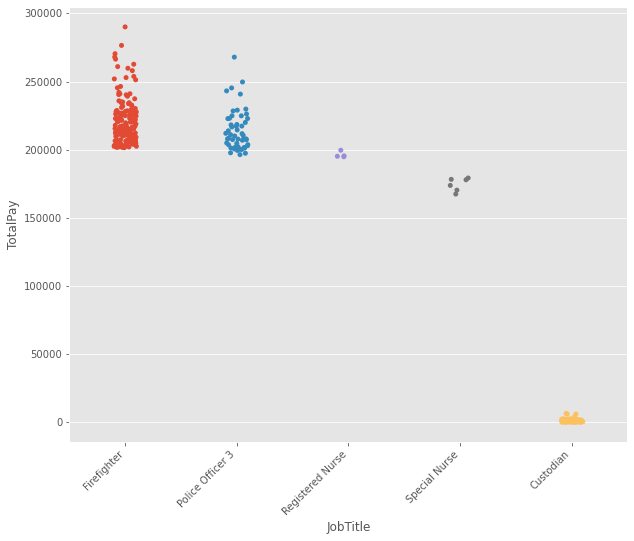

In [92]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45, horizontalalignment='right')
sns.stripplot(x='JobTitle', y='TotalPay', data=anomaly_data, jitter=True)

시각화를 해보면 소방관과 후견인(Custodian)에서 연봉이 유난히 낮은 사람들을 볼 수 있다. 후견인의 경우는 생업을 위한 직업이라고는 볼 수 없기 때문에 그런것으로 보여진다.

##### <font size="5">Mahalanobis Distance in Python 이용한 이상탐지</font>
마할 라  노비스 거리는  다변수 공간에서 두 점 사이의 거리입니다. 여러 변수를 포함하는 통계 분석에서 이상값을 찾는 데 자주 사용됩니다.

In [2]:
import numpy as np
import pandas as pd 
import scipy as stats

data = {'score': [91, 93, 72, 87, 86, 73, 68, 87, 78, 99, 95, 76, 84, 96, 76, 80, 83, 84, 73, 74],
        'hours': [16, 6, 3, 1, 2, 3, 2, 5, 2, 5, 2, 3, 4, 3, 3, 3, 4, 3, 4, 4],
        'prep': [3, 4, 0, 3, 4, 0, 1, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2],
        'grade': [70, 88, 80, 83, 88, 84, 78, 94, 90, 93, 89, 82, 95, 94, 81, 93, 93, 90, 89, 89]
        }

df = pd.DataFrame(data,columns=['score', 'hours', 'prep','grade'])
df.head()

score  hours  prep  grade
0     91     16     3     70
1     93      6     4     88
2     72      3     0     80
3     87      1     3     83
4     86      2     4     88

In [3]:
#create function to calculate Mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

#create new column in dataframe that contains Mahalanobis distance for each row
df['mahalanobis'] = mahalanobis(x=df, data=df[['score', 'hours', 'prep', 'grade']])

#display first five rows of dataframe
df.head()

score  hours  prep  grade  mahalanobis
0     91     16     3     70    16.501963
1     93      6     4     88     2.639286
2     72      3     0     80     4.850797
3     87      1     3     83     5.201261
4     86      2     4     88     3.828734


거리가 통계적으로 유의한지 확인하려면 p-값을 계산해야 합니다.  
각 거리에 대한 p-값은 k-1 자유도가 있는 Mahalanobis 거리의 카이-제곱 통계에 해당하는 p-값으로 계산됩니다. 여기서 k = 변수 수입니다. 
    
따라서 이 경우 4-1 = 3의 자유도를 사용합니다. 

일반적으로 .001보다 작은  p-값은  이상값 으로 간주됩니다. 첫 번째 관측값은 p-값이 .001보다 작기 때문에 데이터 세트에서 이상값임을 알 수 있습니다.


In [4]:
from scipy.stats import chi2

#calculate p-value for each mahalanobis distance 
df['p'] = 1 - chi2.cdf(df['mahalanobis'], 3)

#display p-values for first five rows in dataframe
df.head()

score  hours  prep  grade  mahalanobis         p
0     91     16     3     70    16.501963  0.000895
1     93      6     4     88     2.639286  0.450644
2     72      3     0     80     4.850797  0.183054
3     87      1     3     83     5.201261  0.157639
4     86      2     4     88     3.828734  0.280562

##### <font size="5">IQR을 이용한 이상탐지</font>

In [ ]:
from collections import Counter 

category_feature = [ col for col in data.columns if data[col].dtypes == "object"]
numerical_feature = list(set(data.columns) - set(category_feature) - set(['Id','price']))
print(numerical_feature)

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers

Outliers_to_drop  = detect_outliers(data,2,numerical_feature)
data.loc[Outliers_to_drop]

#### 시계열데이터 이상값 찾기

##### Exponential Smoothing을 활용한 이상탐지
많은 시계열 데이터는시간에 따라 어떤 추세에 따라 상승하거나 하락하는 경우가 많다. 따라서 단순히 과거 데이터 분포를 보고 outlier 를 탐지한다면 점점 상승하거나 하락하는 추세를 갖는 시계열 데이터의 경우 시간이 갈수록 오탐율이 올라갈 것이다. 그래서 이런 추세 패턴을 반영하여 이상치를 탐지하기 위해 사용할 수 있는 방법이 이동 평균과 표준편차를 이용하는 이상 탐지 모델이다. EMA와 EMS는각각 아래와 같은 수식으로 정의한다.  
EMA = w*EMA + (1-w)*x  
EMS = sqrt(w*EMS^2 + (1-w)*(x-EMA)^2)  

이 기법은 특정 시점 이전까지의 데이터에 대해서 계산한 평균 혹은 표준편차와 해당 시점에 측정한 값 x를 이용해서 평균/표준편차를 갱신하는데 이 때 현재 시점의 값 x를 (1-w)만큼의 가중치로 반영하여 계산하는 방식이다. 따라서 w가 작을수록 최근 데이터의 영향력이 더 커진다. 이제 이렇게 구한EMA와 EMS를 이용하여 outlier detection 기준을 아래와 같이 정할 수 있다.  

Alarm = abs(x-EMA) > n * EMS (n은 사용자가 지정)

In [36]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
RANDOM_SEED = np.random.seed(0)

def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

#read data
catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)

In [40]:
print(catfish_sales.head())
pd.infer_freq(catfish_sales.index)

            Total
Date             
1986-01-01   9034
1986-02-01   9596
1986-03-01  10558
1986-04-01   9002
1986-05-01   9239


'MS'

In [43]:
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))
from datetime import datetime
idx = pd.IndexSlice
## 이상값 설정
catfish_sales.loc["1998-12-1"]['Total'] = 10000
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]
lim_catfish_sales.head()

Total
Date             
1996-01-01  20322
1996-02-01  20613
1996-03-01  22704
1996-04-01  20276
1996-05-01  20669

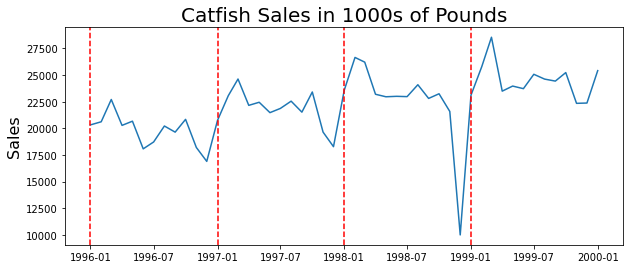

In [44]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='r', linestyle='--')

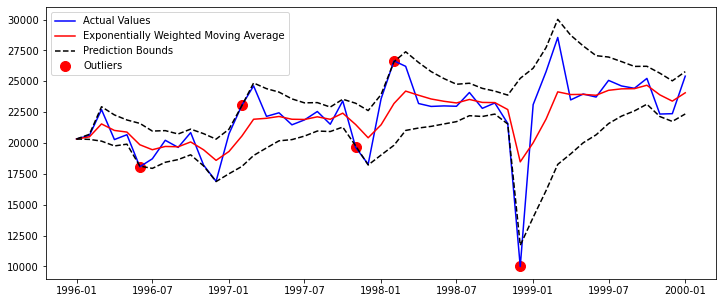

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

window_size = 2
mean = lim_catfish_sales['Total'].ewm(window_size).mean()
std = lim_catfish_sales['Total'].ewm(window_size).std()
std[0] = 0 #the first value turns into NaN because of no data

mean_plus_std = mean + std
mean_minus_std = mean - std

is_outlier = (lim_catfish_sales['Total'] > mean_plus_std) | (lim_catfish_sales['Total'] < mean_minus_std)
outliers = lim_catfish_sales[is_outlier]

plt.figure(figsize=(12,5))
plt.plot(lim_catfish_sales['Total'], c = 'b', label = 'Actual Values')
plt.plot(mean, c = 'r', label = 'Exponentially Weighted Moving Average')
plt.plot(mean_plus_std, 'k--', label = 'Prediction Bounds')
plt.plot(mean_minus_std, 'k--')
plt.scatter(outliers.index, outliers['Total'], c = 'r', marker = 'o', s = 100, label = 'Outliers')
plt.legend()

##### Seasonal decomposition of Time-series by Loess (STL)
만약 대상 시계열 데이터가 seasonal 요소가 강한 데이터라면 위와 같이 주기에 따라 여러 개의 모델을 만들지 말고 STL 기법을 이용할 수도 있다. STL은 시계열 데이터가 갖는 시간 주기를 이미 알고 있는 경우 시계열 데이터를 seasonal, trend, remainder 요소로 분해하여 분석하는 기법이다.

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

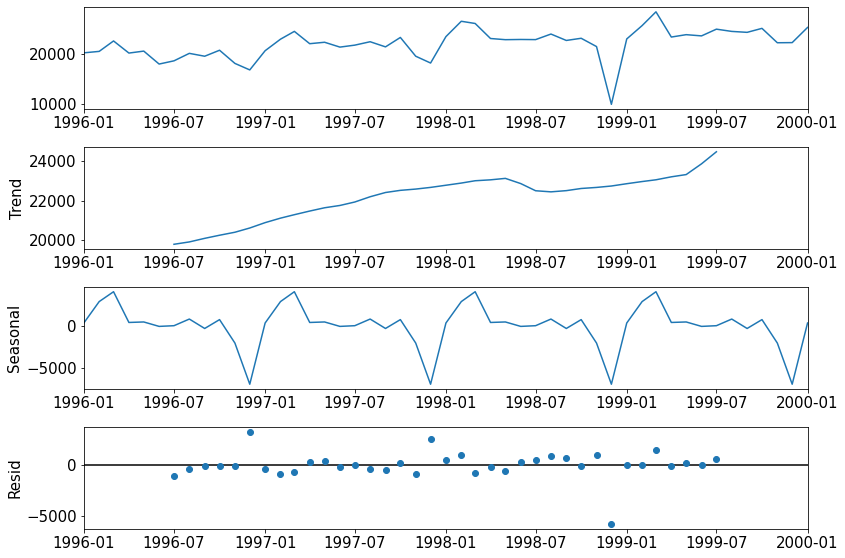

In [54]:
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)

result = seasonal_decompose(lim_catfish_sales,model='additive')
fig = result.plot()

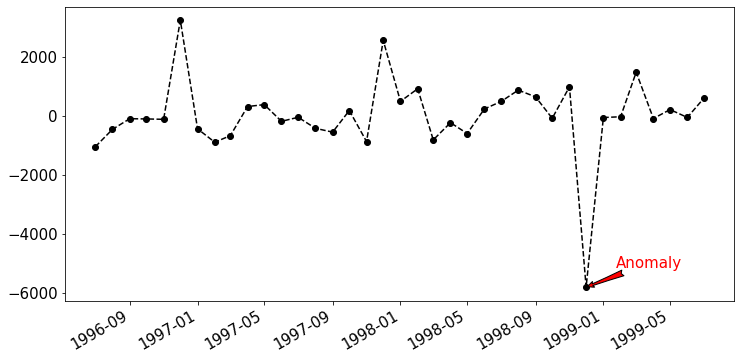

In [57]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)

fig, ax = plt.subplots()
x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')

# annotate 주석 달기
# date2num 날짜 시간 객체를 Matplotlib 날짜로 변환합니다.
ax.annotate('Anomaly', (mdates.date2num(x[35]), y[35]), xytext=(30, 20), 
           textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))

fig.autofmt_xdate()
plt.show()

##### K-mean을 활용한 이상 탐지
1. 먼저 군집수를 Elbow Method나 silhouette을 통해서 군집수를 확인 한다. 
2. PCA를 통해서 주성분 변수를 생성한다. 
3. 그리고 이상값을 그래프를 통해서 확인한다.

In [58]:
from sklearn.cluster import KMeans
import pandas as pd
df = pd.read_csv('TimeSeriesExpedia.csv')
df.head()

srch_id            date_time  site_id  visitor_location_country_id  visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  prop_starrating  prop_review_score  prop_brand_bool  prop_location_score1  prop_location_score2  prop_log_historical_price  position  price_usd  promotion_flag  srch_destination_id  srch_length_of_stay  srch_booking_window  srch_adults_count  srch_children_count  srch_room_count  srch_saturday_night_bool  srch_query_affinity_score  orig_destination_distance  random_bool  comp1_rate  comp1_inv  comp1_rate_percent_diff  comp2_rate  comp2_inv  comp2_rate_percent_diff  comp3_rate  comp3_inv  comp3_rate_percent_diff  comp4_rate  comp4_inv  comp4_rate_percent_diff  comp5_rate  comp5_inv  comp5_rate_percent_diff  comp6_rate  comp6_inv  comp6_rate_percent_diff  comp7_rate  comp7_inv  comp7_rate_percent_diff  comp8_rate  comp8_inv  comp8_rate_percent_diff  click_bool  gross_bookings_usd  booking_bool
0       63  2013-05-23 11:56:25       14                          100                      NaN                   NaN              219   104517                4                4.0                1                  4.16                0.2534                       5.30        15      69.87               1                 8192                    4                   25                  3                    0                1                         0                        NaN                    1937.85            1         NaN        NaN                      NaN         0.0        0.0                      NaN         0.0        0.0                      NaN         NaN        NaN                      NaN         NaN        NaN                      NaN         NaN        NaN                      NaN         NaN        NaN                      NaN         0.0        0.0                      NaN           0                 NaN             0
1       90  2013-04-23 11:12:24       14                          100                      NaN                   NaN              219   104517                4                4.0                1                  4.16                0.2534                       5.29         6      97.49               1                 8192                    2                   44                  1                    0                1                         1                        NaN                    1208.63            1         NaN        NaN                      NaN         0.0        0.0                      NaN         0.0        0.0                      NaN         NaN        NaN                      NaN         0.0        0.0                      NaN         NaN        NaN                      NaN         NaN        NaN                      NaN         0.0        0.0                      NaN           0                 NaN             0
2      133  2013-03-14 11:27:28        5                          219                      NaN                   NaN              219   104517                4                4.0                1                  4.16                0.2534                       5.29        29     206.00               1                 8192                    3                   99                  1                    0                1                         1                        NaN                     397.74            1         NaN        NaN                      NaN        -1.0        0.0                      2.0        -1.0        0.0                      2.0         NaN        NaN                      NaN        -1.0        0.0                      2.0         NaN        NaN                      NaN         NaN        NaN                      NaN         0.0        0.0                      NaN           0                 NaN             0
3      148  2013-03-21 02:24:03       10                            4                      NaN                   NaN              219   104517                4                4.0                1                  4.

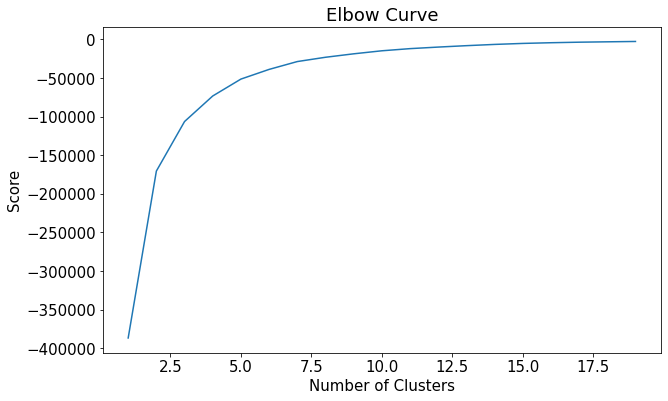

In [59]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
distortions = [kmeans[i].inertia_ for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

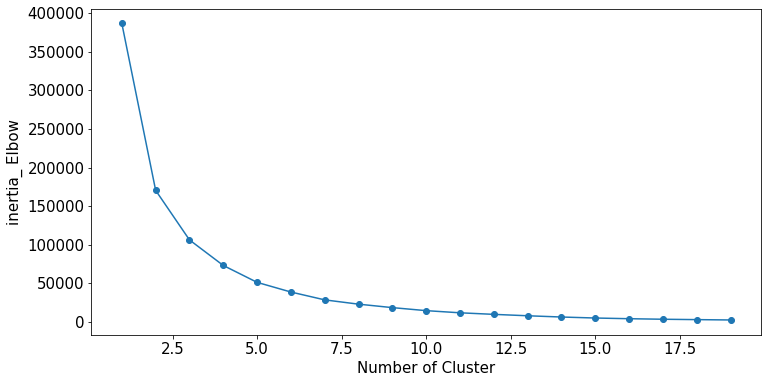

In [62]:
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('inertia_ Elbow')
plt.show()

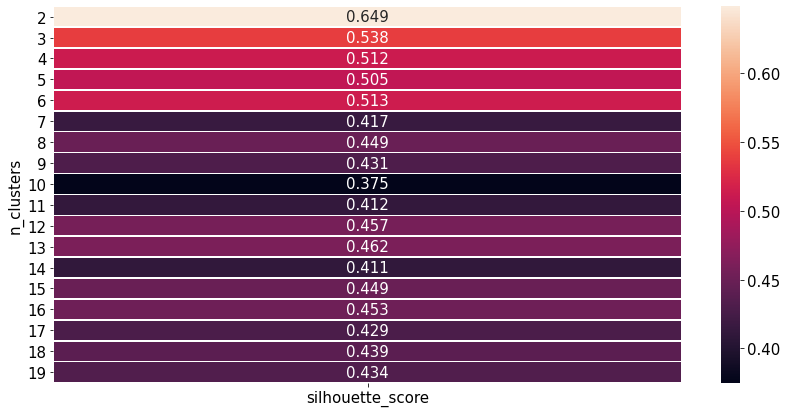

In [69]:
from sklearn.metrics import silhouette_score, silhouette_samples

def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2, 20)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")    
    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()
    
visualize_silhouette_layer(data) 

In [70]:
def visualize_silhouette(cluster_list, X) : 
    import matplotlib.cm as cm
    import math
    range_n_clusters = [2, 3, 4, 5, 6]

    for n_cluster in cluster_list :

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_cluster + 1) * 10])
        clusterer = KMeans(n_clusters = n_cluster, random_state = 326)
        cluster_labels = clusterer.fit_predict(X)


        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_cluster,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_cluster):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_cluster),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6486548836906421
For n_clusters = 9 The average silhouette_score is : 0.44899827404759163
For n_clusters = 10 The average silhouette_score is : 0.4514529142403919


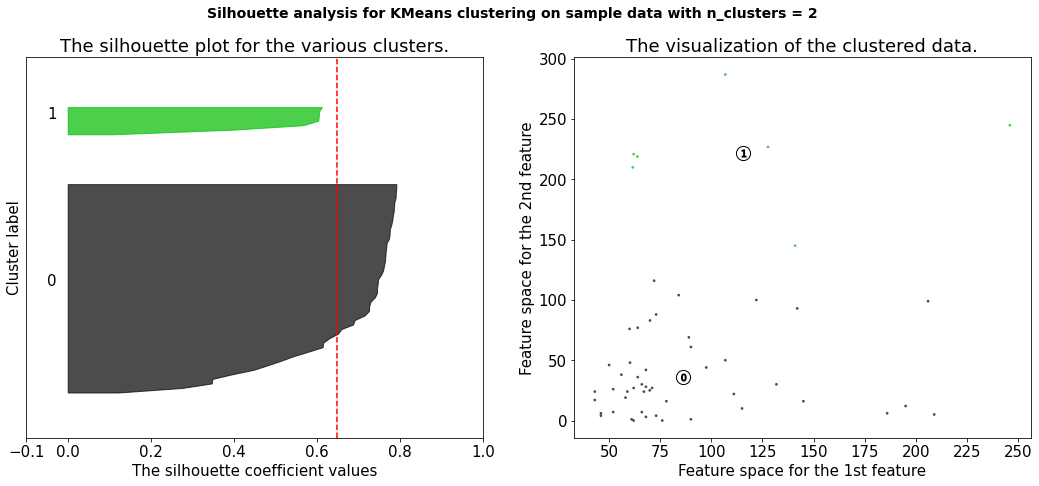

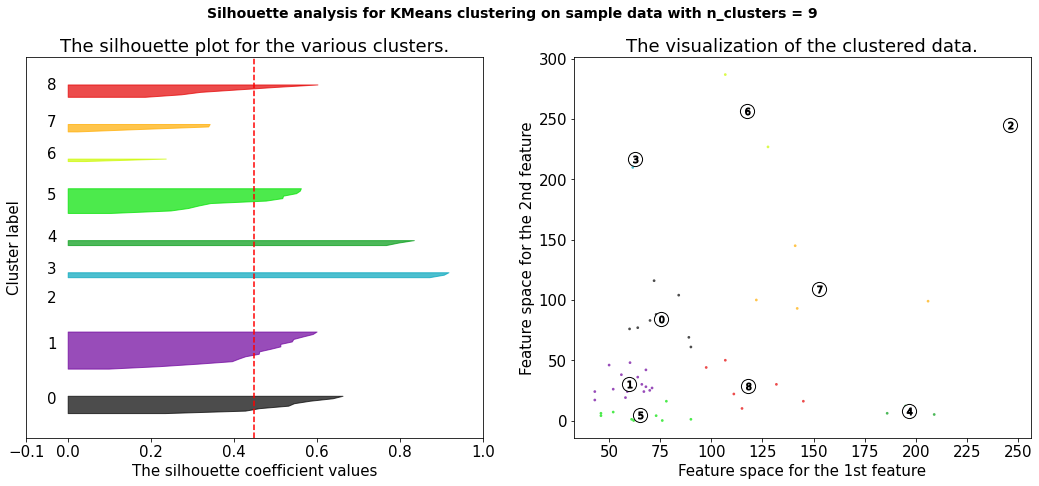

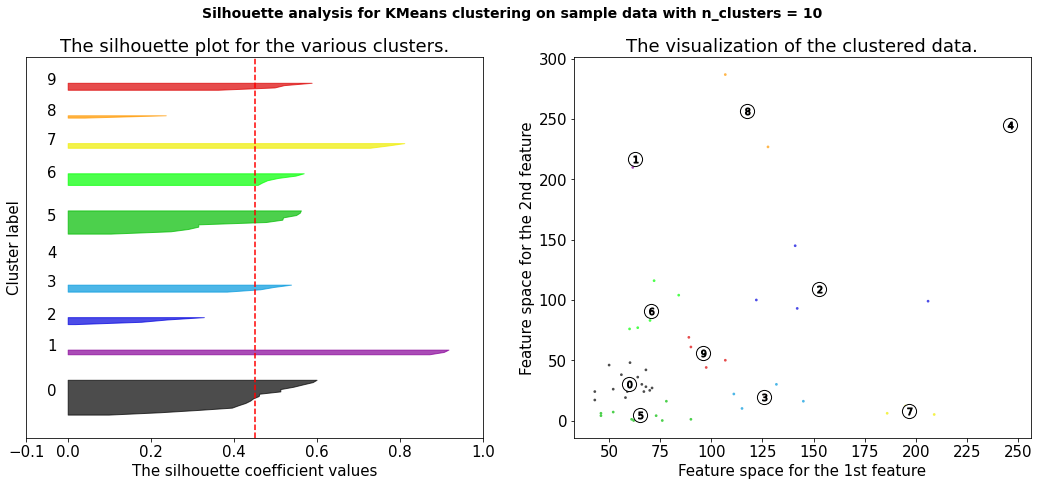

In [71]:
visualize_silhouette([2,9,10], data.values)

In [72]:
from sklearn.metrics import silhouette_samples, silhouette_score
# silhouette_samples(data, km_labels)
np.mean(silhouette_samples(data,kmeans[1].fit_predict(data)))
# 0.6486548836906421

data['cluster2'] = kmeans[9].fit_predict(data)
data['score'] = silhouette_samples(data, kmeans[9].fit_predict(data))
data.head()

price_usd  srch_booking_window  srch_saturday_night_bool  cluster2     score
0      69.87                   25                         0         0  0.408464
1      97.49                   44                         1         7  0.197785
2     206.00                   99                         1         8  0.000000
3     127.71                  227                         0         1  0.047405
4     186.00                    6                         0         2  0.767393

In [73]:
data.groupby('cluster2')['score'].mean()

cluster2
0    0.455625
1    0.143553
2    0.798802
3    0.378073
4    0.481774
5    0.416868
6    0.000000
7    0.384727
8    0.000000
9    0.898802
Name: score, dtype: float64

PCA 수행

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Take useful feature and standardize them
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = data.values
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
# reduce to 2 important features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
data1 = data.copy()
pca.explained_variance_ratio_
# standardize these 2 new features

array([0.52257177, 0.32186023])

In [80]:
# 왜 다시 PCA 한것을 스케일링을 다시 하는지 이유를 모르겠다.
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
df['cluster'] = kmeans[9].predict(data)
df.index = data.index
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

1    14
8    10
4     8
2     7
0     4
5     3
6     3
3     2
9     2
7     1
Name: cluster, dtype: int64

In [82]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]=np.linalg.norm(Xa-Xb)
    return distance

outliers_fraction = 0.1
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[9])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df['anomaly1'] = (distance >= threshold).astype(int)

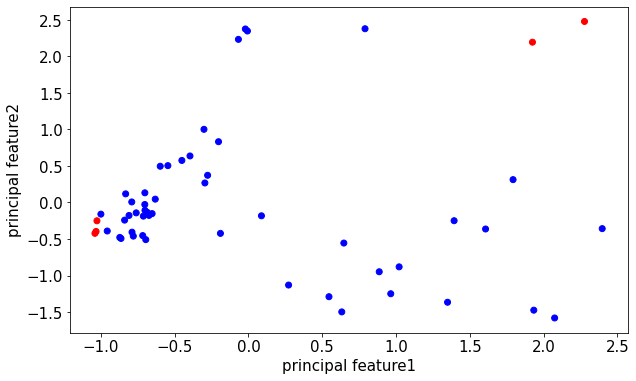

In [83]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

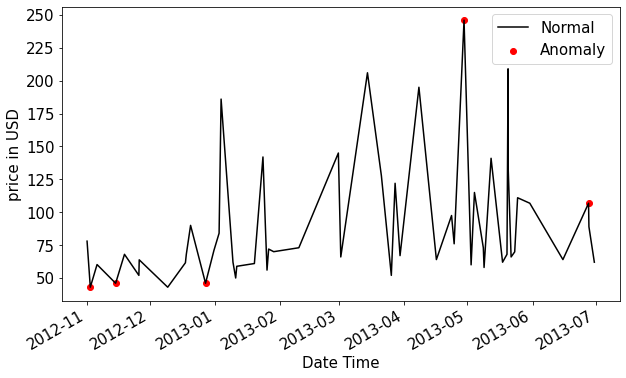

In [84]:
df = df.sort_values('date_time')
#df['date_time_int'] = df.date_time.astype(np.int64)
fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly1'] == 1, ['date_time', 'price_usd']] #anomaly


ax.plot(pd.to_datetime(df['date_time']), df['price_usd'], color='k',label='Normal')
ax.scatter(pd.to_datetime(a['date_time']),a['price_usd'], color='red', label='Anomaly')
ax.xaxis_date()
plt.xlabel('Date Time')
plt.ylabel('price in USD')
plt.legend()
fig.autofmt_xdate()
plt.show()

##### Interquartile Range (IQR) 을 사용해서 Detection
참고사이트 :  
https://towardsdatascience.com/anomaly-detection-in-time-series-sensor-data-86fd52e62538
1. EDA
2. PCA

In [90]:
from sklearn.cluster import KMeans
import pandas as pd
df=pd.read_csv('step2-output.csv')
# Let's convert the data type of timestamp column to datatime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [92]:
df.describe().T

count        mean         std        min         25%         50%         75%         max
sensor_00  102089.0    2.363927    0.400443   0.000000    2.430961    2.453588    2.466377    2.549016
sensor_01  102089.0   47.831341    2.418637  22.439240   46.701385   47.960070   49.218750   55.772570
sensor_02  102089.0   51.661225    2.945869  36.545140   51.085070   52.256943   53.385410   56.032990
sensor_03  102089.0   43.673761    2.141557  33.289930   42.578130   43.923610   45.138885   48.220490
sensor_04  102089.0  597.324017  124.859022   2.873264  626.157400  631.481400  636.342600  671.990700
...             ...         ...         ...        ...         ...         ...         ...         ...
sensor_47  102089.0   42.903315    8.245007  27.777779   38.773150   41.666670   45.138890  196.759300
sensor_48  102089.0  120.024450   59.076039  28.645830   74.942130  107.349500  156.539400  502.314800
sensor_49  102089.0   54.138947   14.059392  28.067130   46.875000   51.215280   57.002320  323.206000
sensor_50  102089.0  194.061870   56.089851  30.960648  175.347200  199.942100  225.983800  483.506900
sensor_51  102089.0  186.283412   49.155388  30.381940  176.504600  194.155100  211.805600  466.145800

[51 rows x 8 columns]

Gaphical EDA
아래는 지면상 1개 변수만 출력한다

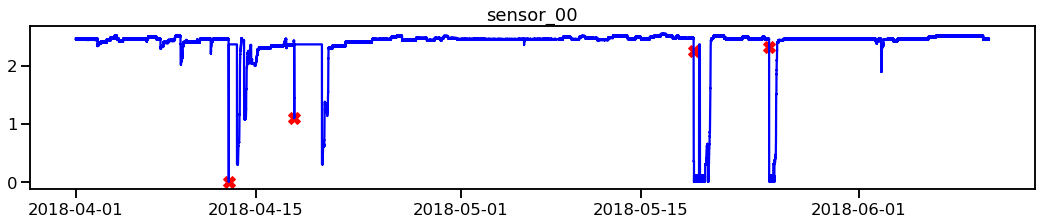

In [93]:
# Vizualize time series and the BROKEN state (red dots) in the same graph for each sensor
import warnings
# Extract the readings from BROKEN state and resample by daily average
broken = df[df['machine_status']=='BROKEN']
# Extract the names of the numerical columns
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
# Plot time series for each sensor with BROKEN state marked with X in red color
num = 1
for name in names:
    if num < 2:
        sns.set_context('talk')
        _ = plt.figure(figsize=(18,3))
        _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
        _ = plt.plot(df[name], color='blue')
        _ = plt.title(name)
        plt.show()
        num += 1

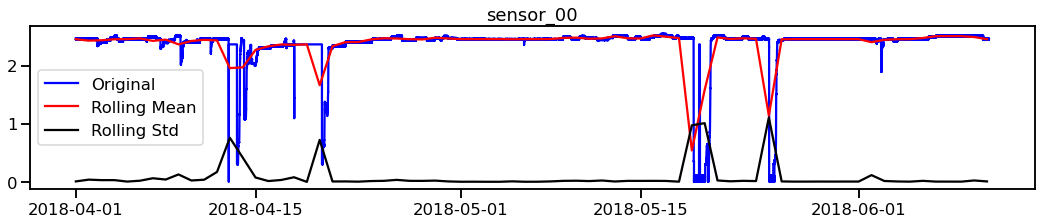

In [96]:
# Resample the entire dataset by daily average
rollmean = df.resample(rule='D').mean()
rollstd = df.resample(rule='D').std()
# Plot time series for each sensor with BROKEN state marked with X in red 
num = 1
for name in names:
    if num < 2:
        _ = plt.figure(figsize=(18,3))
        _ = plt.plot(df[name], color='blue', label='Original')
        _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
        _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
        _ = plt.legend(loc='best')
        _ = plt.title(name)
        plt.show()
        num += 1

Step 4: Pre-processing and Feature Engineering

In [97]:
# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# Extract the names of the numerical columns
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
x = df[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

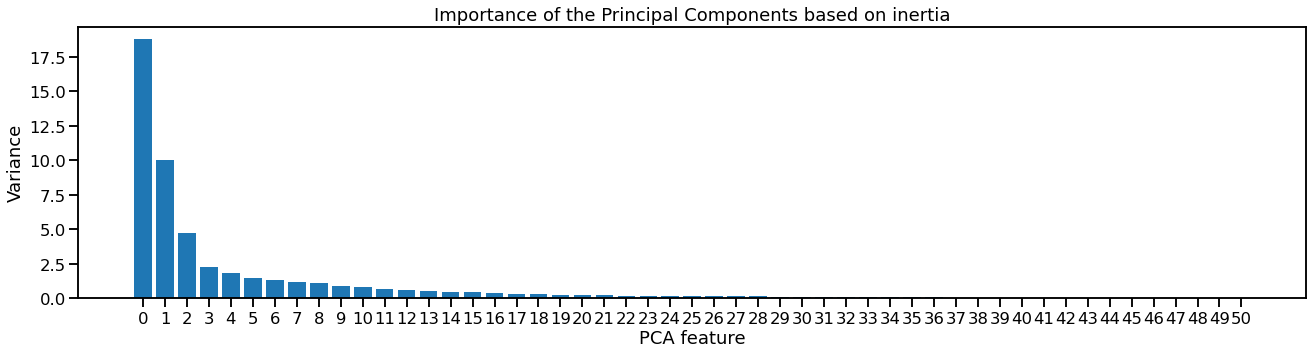

In [98]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [99]:
# Calculate PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
df['pc1']=pd.Series(principalDf['pc1'].values, index=df.index)
df['pc2']=pd.Series(principalDf['pc2'].values, index=df.index)
df.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  sensor_22  sensor_23  sensor_24  sensor_25  sensor_26  sensor_27  sensor_28  sensor_29  sensor_30  sensor_31  sensor_32  sensor_33  sensor_34  sensor_35  sensor_36  sensor_37  sensor_38  sensor_39  sensor_40  sensor_41  sensor_42  sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  sensor_51 machine_status         pc1        pc2
date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   76.45975   13.41146   16.13136   15.56713   15.05353   37.22740   47.52422   31.11716   1.681353   419.5747   461.8781   466.3284   2.565284   665.3993   398.9862   880.0001   498.8926   975.9409   627.6740   741.7151   848.0708   429.0377   785.1935   684.9443   594.4445   682.8125   680.4416   433.7037   171.9375   341.9039   195.0655   90.32386   40.36458   31.51042   70.57291   30.98958  31.770832   41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   201.3889         NORMAL -242.203184  14.347555
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   76.45975   13.41146   16.13136   15.56713   15.05353   37.22740   47.52422   31.11716   1.681353   419.5747   461.8781   466.3284   2.565284   665.3993   398.9862   880.0001   498.8926   975.9409   627.6740   741.7151   848.0708   429.0377   785.1935   684.9443   594.4445   682.8125   680.4416   433.7037   171.9375   341.9039   195.0655   90.32386   40.36458   31.51042   70.57291   30.98958  31.770832   41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   201.3889         NORMAL -242.203184  14.347555
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   73.54598   13.32465   16.03733   15.61777   15.01013   37.86777   48.17723   32.08894   1.708474   420.8480   462.7798   459.6364   2.500062   666.2234   399.9418   880.4237   501.3617   982.7342   631.1326   740.8031   849.8997   454.2390   778.5734   715.6266   661.5740   721.8750   694.7721   441.2635   169.9820   343.1955   200.9694   93.90508   41.40625   31.25000   69.53125   30.46875  31.770830   41.66666  39.351852   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   203.7037         NORMAL -285.297844  46.143520
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   76.98898   13.31742   16.24711   15.69734   15.08247   38.57977   48.65607   31.67221   1.579427   420.7494   462.8980   460.8858   2.509521   666.0114   399.1046   878.8917   499.0430   977.7520   625.4076   739.2722   847.7579   474.8731   779.5091   690.4011   686.1111   754.6875   683.3831   446.2493   166.4987   343.9586   193.1689  101.04060   41.92708   31.51042   72.13541   30.46875  31.510420   40.88541  39.062500   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   203.1250         NORMAL -288.400547  70.490720
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   76.58897   13.35359   16.21094   15.69734   15.08247   39.48939   49.06298   31.95202   1.683831   419.8926   461.4906   468.2206   2.604785   663.2111   400.5426   882.5874   498.5383   979.5755   627.1830   737.6033   846.9182  

정상성 테스트

In [100]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc2'])
# Print p-value
print(result[1])

0.06245230461625288
3.7133590362430754e-05


In [111]:
## 이부분은 왜 하는지 모르겠음. 
## 저장된 시계열 데이터에 대해서 이전 값 대비 현재 값의 변동율(change percentage)을 구하고 싶을 때 pandas 의 pct_change()
# Compute change in daily mean 
pca1 = principalDf['pc1'].pct_change()
# Compute autocorrelation
autocorrelation = pca1.dropna().autocorr(lag=1)
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -0.029753570782002234


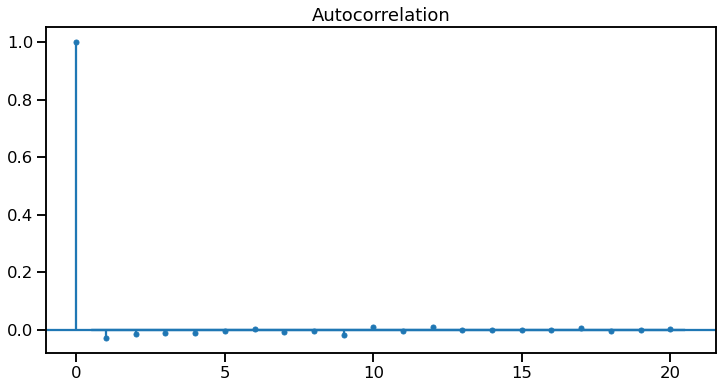

In [113]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(), lags=20, alpha=0.05)
plt.show()

Autocorrelation is:  -0.00018975157355805984


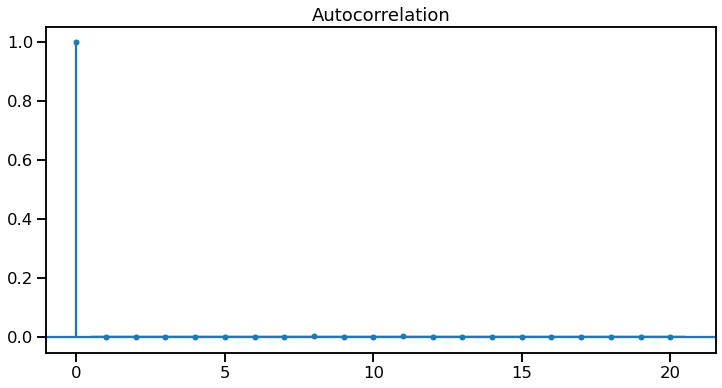

In [114]:
# Compute change in daily mean 
pca2 = principalDf['pc2'].pct_change()
# Compute autocorrelation
autocorrelation = pca2.autocorr()
print('Autocorrelation is: ', autocorrelation)
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca2.dropna(), lags=20, alpha=0.05)
plt.show()

In [115]:
q1_pc1, q3_pc1 = df['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
# Calculate outlier bounds for pc2
q1_pc2, q3_pc2 = df['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

In [116]:
lower_pc1, upper_pc1

(-1026.2867737029674, 154.93303181477364)

In [127]:
df['anomaly_pc1'] = ((df['pc1']>upper_pc1) | (df['pc1']<lower_pc1)).astype('int')
df['anomaly_pc2'] = ((df['pc2']>upper_pc2) | (df['pc2']<lower_pc2)).astype('int')
df['anomaly_pc1'].value_counts() ,df['anomaly_pc2'].value_counts()


(0    77772
 1    24317
 Name: anomaly_pc1, dtype: int64,
 0    101055
 1      1034
 Name: anomaly_pc2, dtype: int64)

In [122]:
outliers_pc1 = df.loc[(df['pc1']>upper_pc1) | (df['pc1']<lower_pc1), 'pc1']
outliers_pc2 = df.loc[(df['pc2']>upper_pc2) | (df['pc2']<lower_pc2), 'pc2']

In [125]:
len(outliers_pc1)/len(df),  len(outliers_pc2)/len(df)

(0.23819412473430046, 0.010128417361321983)

2. 단일 변수 선택 : SelectKBest
단일 변수 선택법은 각각의 특성을 하나만 사용했을 때의 예측모델의 성능을 평가하여, 정확도 또는 상관관계가 가장 좋은 특성만을 선택하는 방법입니다. 예를 들어, 몸무게(y)를 예측하기 위한 특성(X)에 키, 나이, 성별이 있다면 키-몸무게, 나이-몸무게, 성별-몸무게를 어떤 특정지표(정확도, 카이제곱값 등)로써 평가하여 가장 좋은 특성을 선별하는 방법입니다.
하지만 좋은 단일 변수만을 모았을 때 반드시 모델이 개선된다는 보장은 없습니다.

In [128]:
# Apply SelectKBest class to extract the best 3 features - Univariate feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
x = df.drop(['machine_status', 'pc1', 'pc2', 'anomaly_pc1', 'anomaly_pc2'], axis=1)
y = df['machine_status']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(x_scaled, y)

In [132]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
# print(featureScores.nlargest(3, 'Score'))
featureScores.nlargest(3, 'Score')

Feature        Score
12  sensor_12  3959.586888
11  sensor_11  3912.261624
5   sensor_05  3761.730767

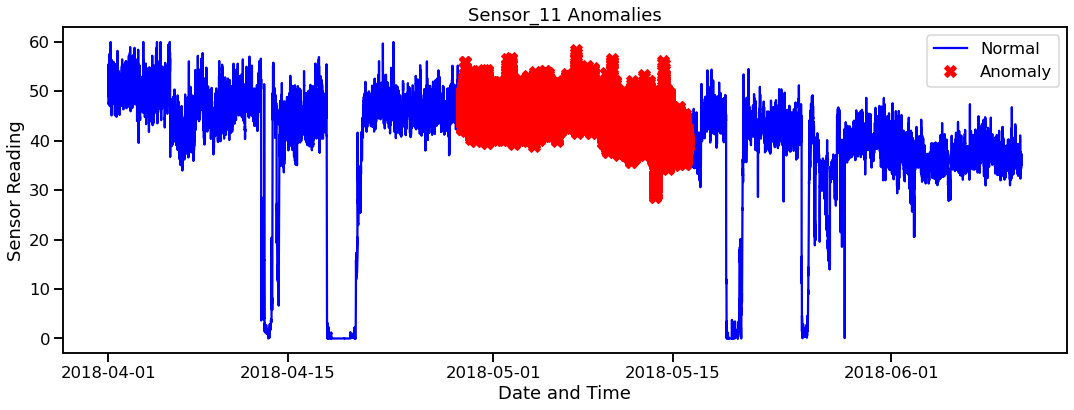

In [133]:
# Let's plot the outliers from pc1 on top of the sensor_11 see where they occured in the time series
a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

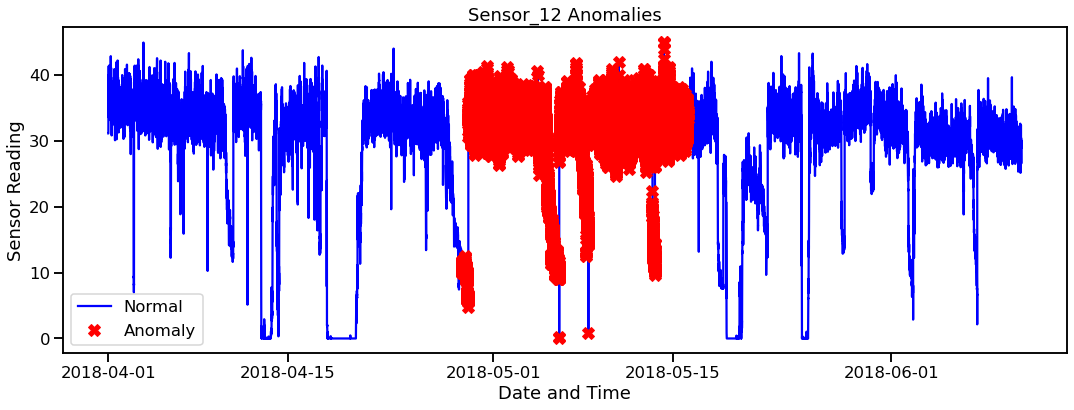

In [134]:
# Let's plot the outliers from pc2 on top of the sensor_00 see where they occured in the time series
a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_12'], color='blue', label='Normal')
_ = plt.plot(a['sensor_12'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_12 Anomalies')
_ = plt.legend(loc='best')
plt.show();

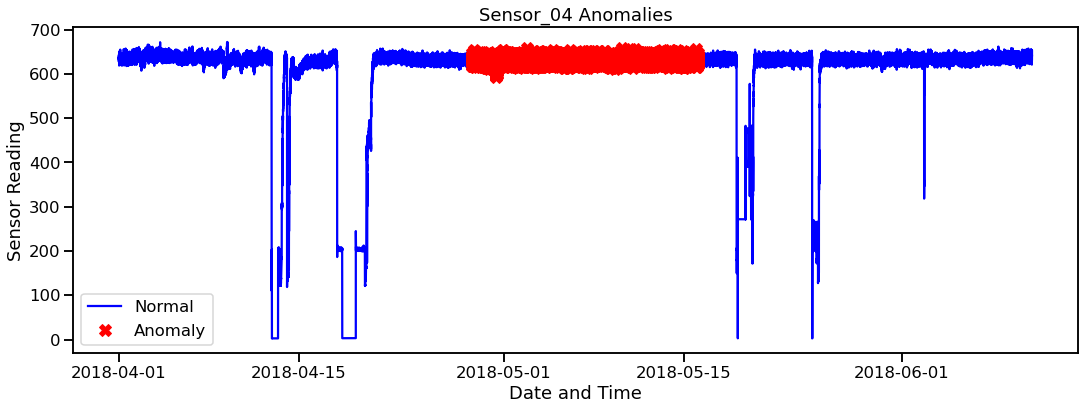

In [135]:
# Let's plot the outliers from pc2 on top of the sensor_00 see where they occured in the time series
a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_04'], color='blue', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_04 Anomalies')
_ = plt.legend(loc='best')
plt.show();

### 이상값 처리 방법
이상값을 처리하는 방법들로는 이상치들을 절단(trim)하는 방법, 이상치들을 이상치의 하한값, 상한값으로 변환하는 조정(winsorizing)의 방법이 있다. 이상값에 대한 정의는 아래와 같이 여러가지가 있기 때문에 분석자가 데이터셋의 상황에 맞게 판단해서 선택해야 한다.

#### 절단(Trim or Truncation): 경계값 너머의 이상치(outlier)들을 제거 

In [11]:
import pandas as pd
# imputer 를 import 하기 위해서 선행 import  필요
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df=pd.read_csv("./heart.csv", na_values=['', 'NA', -1, 9999])

IQR = df['Cholesterol'].quantile(0.75) - df['Cholesterol'].quantile(0.25)
line_down = df['Cholesterol'].quantile(0.25) - IQR*1.5
line_up = df['Cholesterol'].quantile(0.75) + IQR*1.5
print(line_down, line_up) 

out_index = df[['Cholesterol']].query('Cholesterol <=@line_down or Cholesterol >=@line_up').index
trimmed = df['Cholesterol'].drop(out_index)

32.625 407.625


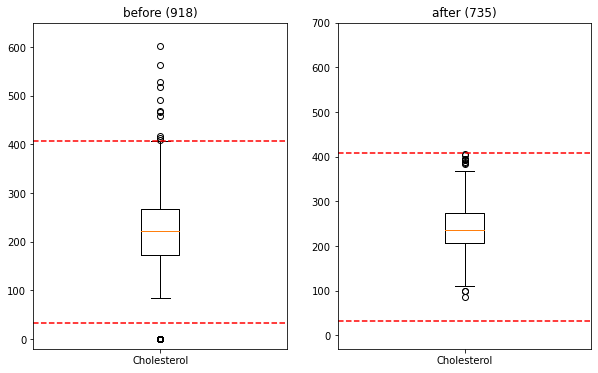

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(df['Cholesterol'], labels=['Cholesterol'])
ax1.set_title("before (%s)"%df['Cholesterol'].shape)
ax1.set_ylim(-20,650)
ax1.axhline(line_up, linestyle="--", color="red")
ax1.axhline(line_down, linestyle="--", color="red")

ax2.boxplot(trimmed, labels=['Cholesterol'])
ax2.set_title("after (%s)"%trimmed.shape)
ax2.set_ylim(-30,700)
ax2.axhline(line_up, linestyle="--", color="red")
ax2.axhline(line_down, linestyle="--", color="red")

plt.show()

#### 조정(Winsorizing or clipping): 경계값 너머의 이상치들을 상한값, 하한값으로 치환
조정하려는 데이터 객체에 .clip(하한값, 상한값)이라는 함수를 활용하면 간편하게 조정된 데이터셋을 얻을 수 있다. 이상치의 경계인 상한값과 하한값은 분석가가 데이터셋의 상황에 따라 알맞게 정의할 수 있다. 나는 아래에서 IQR*1.5를 기준으로 한 이상치 경계를 구해 적용했다. (line_down, line_up)

32.625 407.625


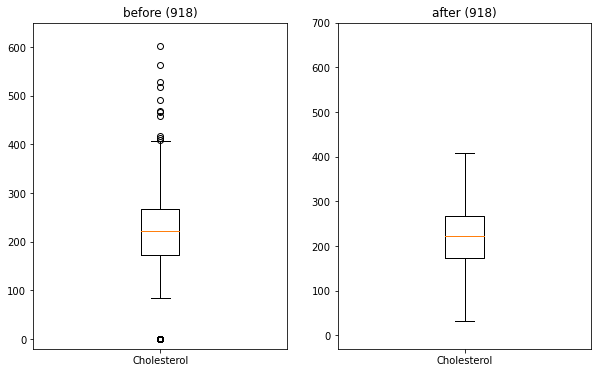

In [13]:
IQR = df['Cholesterol'].quantile(0.75) - df['Cholesterol'].quantile(0.25)
line_down = df['Cholesterol'].quantile(0.25) - IQR*1.5
line_up = df['Cholesterol'].quantile(0.75) + IQR*1.5
print(line_down, line_up) 

winsorized = df['Cholesterol'].clip(line_down,line_up)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(df['Cholesterol'], labels=['Cholesterol'])
ax1.set_title("before (%s)"%df['Cholesterol'].shape)
ax1.set_ylim(-20,650)

ax2.boxplot(winsorized, labels=['Cholesterol'])
ax2.set_title("after (%s)"%winsorized.shape)
ax2.set_ylim(-30,700)

plt.show()

#### DBSCAN: -1로 구분되는 이상치들을 제거
밀도기반 클러스터링 기법 중 하나인 DBSCAN을 사용하여 데이터셋을 이상치와 나머지로 클러스터링 할 수 있다. Scikit learn의 DBSCAN 함수를 사용한다

 0    667
-1     53
 1     16
 2     10
dtype: int64


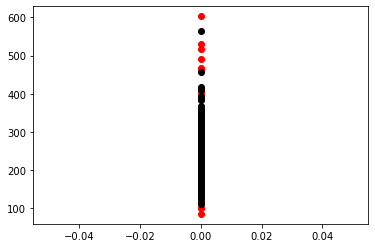

In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
nonan = df['Cholesterol'].replace(0, np.nan).dropna()

dbscan = DBSCAN(eps=3, min_samples=10).fit(pd.DataFrame(nonan))
db_label = pd.Series(dbscan.labels_)
print(db_label.value_counts())  # -1이 이상치

dbdf = pd.DataFrame( {'outlier':db_label, 'Chol':nonan})

for outlier , Chol in dbdf.values:
    if outlier == -1:
        plt.plot(0,Chol,'o',color='red')
    else:
        plt.plot(0,Chol,'o',color='black')

plt.show()

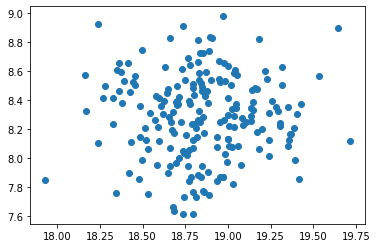

DBSCAN(eps=0.28, min_samples=20)


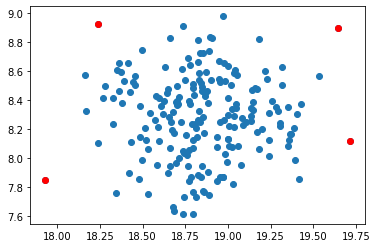

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from numpy import random, where
import matplotlib.pyplot as plt

random.seed(7)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(20, 5))

plt.scatter(x[:,0], x[:,1])
plt.show()

dbscan = DBSCAN(eps = 0.28, min_samples = 20)
print(dbscan)

pred = dbscan.fit_predict(x)
anom_index = where(pred == -1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show() 

## 4.종속 변수 확인
종속변수에 대해서 시각화 및 분포를 확인 한다.

### 종속변수가 범주형인경우
시각화 및 value_counts 를 해서 클래스 불균형이 있는지 확인 한다.

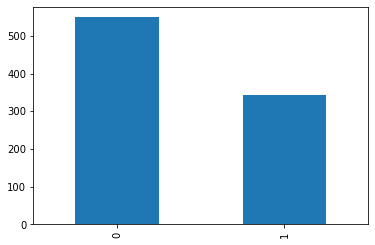

In [5]:
titanic['Survived'].value_counts().plot(kind='bar') 
plt.show()

### 종속변수가 수치형인경우
히스토그램이나 boxplot를 그려 이상치가 있는지 확인 한다.  
종속변수 같은경우 정규분포를 따르는것이 회귀모형 추정의 신뢰성을 높이기 때문에 한쪽으로 치우친 분포를 가졌을때는  
정규변환을 통해서 변환한다.

*) 참고로 회귑분석 가정중에 정규성은 오차항은 정규 분포를 따른다. 이 가정은 F-검정 방법을 사용  
하기 위하여 반드시 필요하다. 오차항이 정규분포를 따르므로 종속변수도 정규 분포를 따른다.

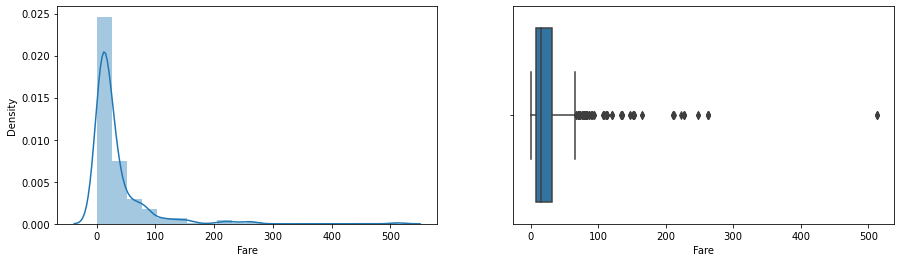

In [11]:
# titanic['Fare'].hist()
f, axs = plt.subplots(1, 2, figsize=(15, 4))
# sns.distplot(titanic['Fare'], bins=20,ax=axs[0])
sns.histplot(titanic['Fare'], bins=20,ax=axs[0],kde=True,stat="density")
sns.boxplot(x='Fare', data = titanic, ax=axs[1], orient = 'v')
plt.show()

<font size="5"> 아래 왜도 및 첨도를 확인 하여 분포가 비대칭적일 경우 로그 변환을 하면 된다. </font>  
그래서 log1p를 적용하여 다시 시각화를 하면 된다.

<font size="5"> 그리고 각 컬럼이 회귀 결과에 미치는 영향이 어느정도인지 시각화해서 알아볼수 있다</font>  
해석을 할때는 피쳐 값이 증가 할때 양의 방향 선형성이 가장크다.. 아래 예로 들면 2ndFlrSF에 따라 price가 높다든지..
GarageArea 에 따라서 price가 높다든지.. 등을 작성 하면 될거 같다. 


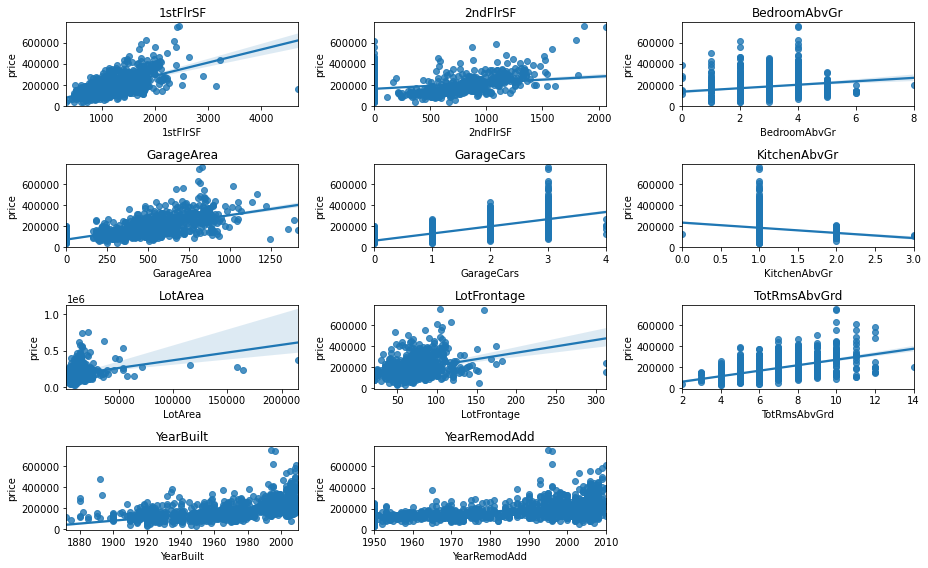

In [56]:
n = 1
plt.figure(figsize=(13,8)) # 먼저 창을 만들고
for col in numerical_feature:
    ax = plt.subplot(4,3,n)    
    sns.regplot(x=col , y='price',data=data )
    plt.title(col)
    n += 1
    
plt.tight_layout()  # 창 크기에 맞게 조정         
plt.show()

## 5.명목형 변수 분포 살펴보기
종속변수를 제외한 독립변수 중에서 명목형 변수에 대해서 확인해보자

In [22]:
titanic['Survived'] = titanic['Survived'].astype(object)
titanic['Pclass'] = titanic['Pclass'].astype(object)

category_feature = [ col for col in titanic.columns if titanic[col].dtypes == "object"]
category_feature = list(set(category_feature) - set(['PassengerId','Survived']))
category_feature

['Sex', 'Embarked', 'Cabin', 'Pclass', 'Name', 'Ticket']

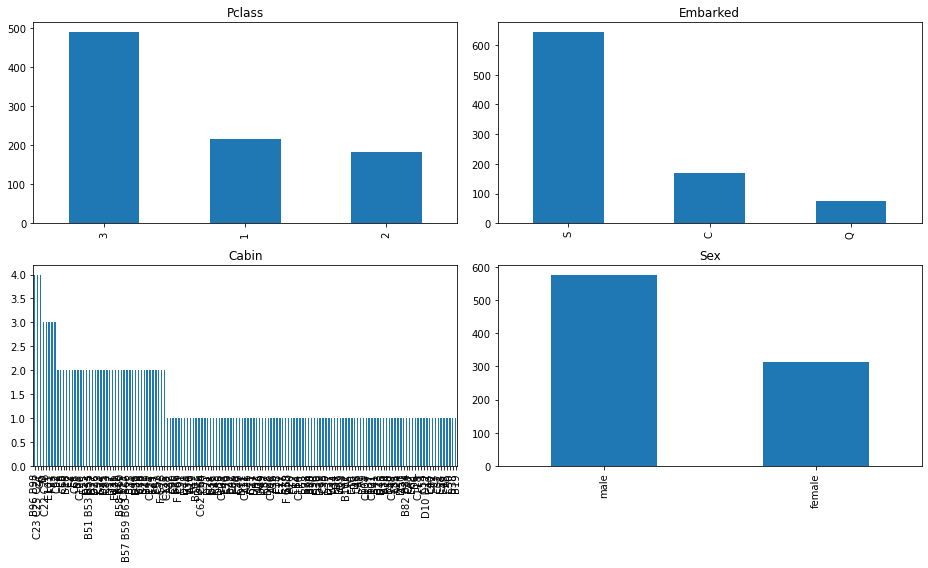

In [34]:
plt.figure(figsize=(13,8)) # 먼저 창을 만들고
n = 1
for col in category_feature:
    unique_df = titanic[col].value_counts()
    
    if len(unique_df) < 150:
        ax = plt.subplot(2,2,n) # for문을 돌면서 Axes를 추가
        unique_df.plot(kind='bar') 
        plt.title(col) 
        n+=1

plt.tight_layout()  # 창 크기에 맞게 조정        
plt.show()         

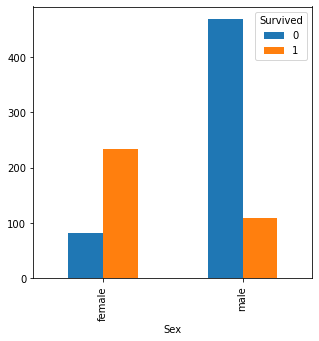

In [57]:
sex_df = titanic.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')
# pd.crosstab(titanic['Sex'], titanic['Survived'])
sex_df.plot(kind='bar', figsize=(5,5))
plt.show()

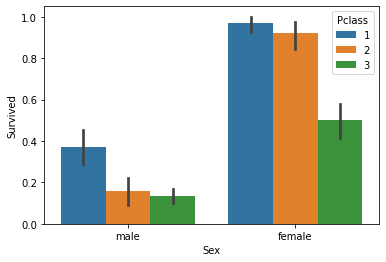

In [58]:
# sns.histplot(data=titanic,x='Sex',hue='Survived')
sns.barplot(data=titanic, x='Sex', y='Survived', hue='Pclass')
plt.show()

## 6.수치형 변수 분포 살펴보기
종속변수를 제외한 독립변수 중에서 수치형 변수에 대해서 확인해보자

['Age' 'Fare' 'Parch' 'SibSp']


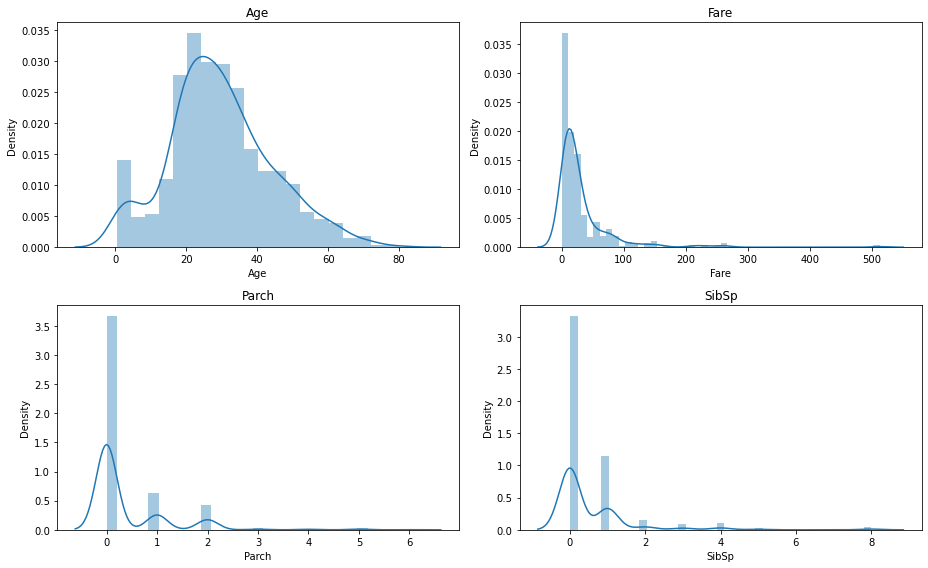

In [23]:
numerical_feature = list(set(titanic.columns) - set(category_feature) - set(['PassengerId','Survived']))
numerical_feature = np.sort(numerical_feature)
print(numerical_feature)

n = 1

plt.figure(figsize=(13,8)) # 먼저 창을 만들고
for col in numerical_feature:
    ax = plt.subplot(2,2,n)
    sns.distplot(titanic.loc[titanic[col].notnull(), col])
    plt.title(col)
    n += 1
    
plt.tight_layout()  # 창 크기에 맞게 조정         
plt.show()

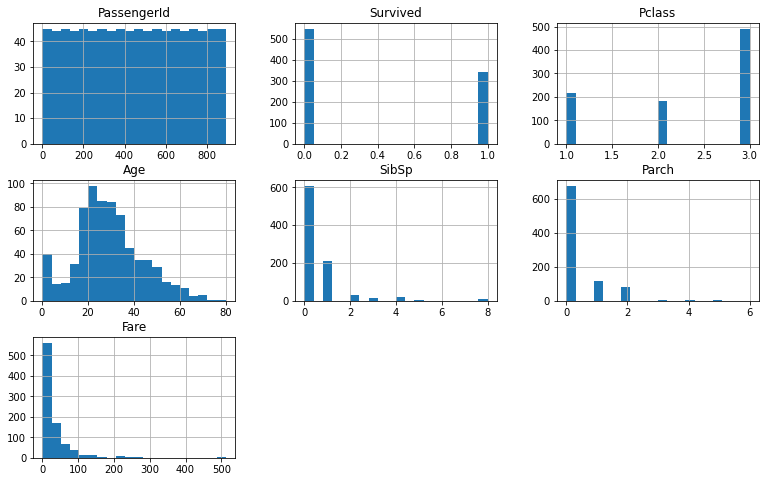

In [20]:
plt.rcParams['figure.figsize'] = [13, 8]
titanic.hist(grid=True, bins=20)
plt.show()

pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도를 그립니다.  
각 그리드는 두 변수간의 관게를 나타내는 그래프를 그리고  
같은 변수끼리 짝을 이루는 대각선 방향에는 히스토 그램을 그린다.

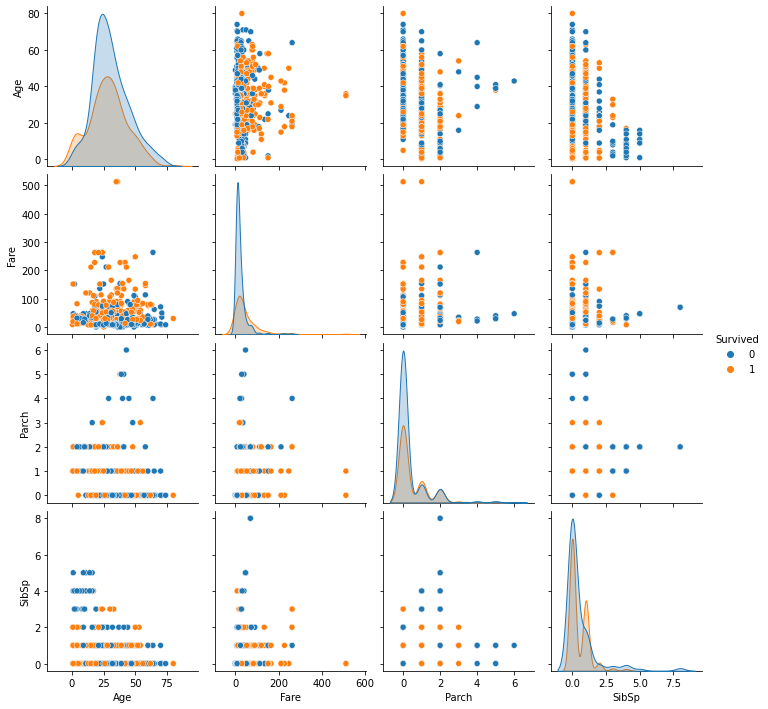

In [65]:
sns.pairplot(titanic[list(numerical_feature) + ['Survived']], hue='Survived', 
             x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()

## 7.수치형, 명목형 변수간 데이터 탐색
수치형과 명목형 변수간.. 종속변수 등을 통해서 데이터 탐색

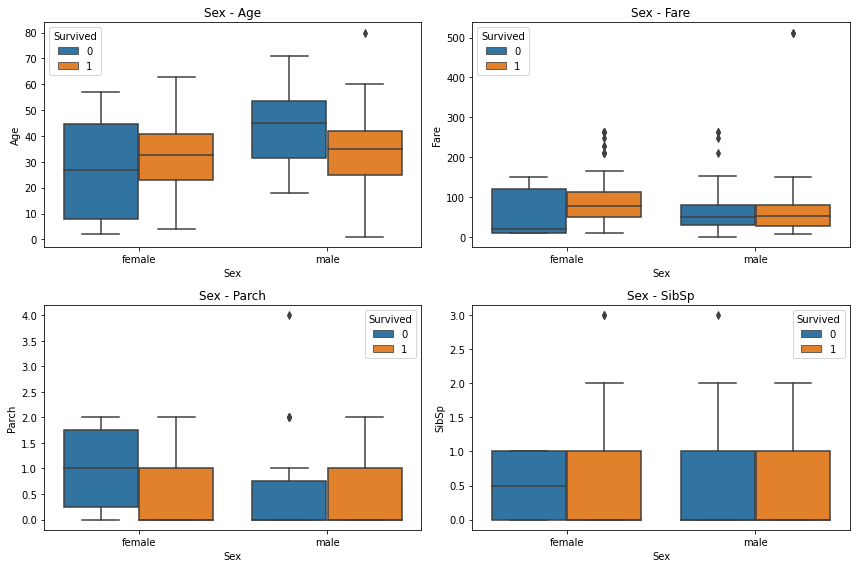

In [69]:
plt.figure(figsize=(12,8))
n = 1
for col in numerical_feature:
    ax = plt.subplot(2,2,n)
    sns.boxplot(x='Sex', y=col, hue='Survived', data=titanic.dropna())
    plt.title("Sex - {}".format(col))
    n += 1

plt.tight_layout()
plt.show()

<font size="5">종속변수가 연속형인경우 즉 회귀인경우는</font>

해석하는 방법이 범주에 대해서 각 그룹의 평균차이가 , 편차가 크거는 영향이 크다고 볼수 있다는 식으로 작성 하면 될듯  

BoxPlot을 그려 Categorical Feature와 SalePrice의 관계를 확인합니다.  
일부 범주는 다른 범주보다 SalePrice와 관련하여 더 다양하게 보입니다.   
Neighborhood 변수는 주택 가격 편차가 매우 크므로 영향이 크다고 생각됩니다.  
SaleType 또한 마찬가지입니다.  
또한 수영장이 있으면 가격이 크게 증가하는 것 같습니다.  
정리하면 SalePrice에 영향을 많이 끼치는 변수로는 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',   'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType' 등이 있습니다.  

In [ ]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=df_train["SalePrice"], data=df_train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()

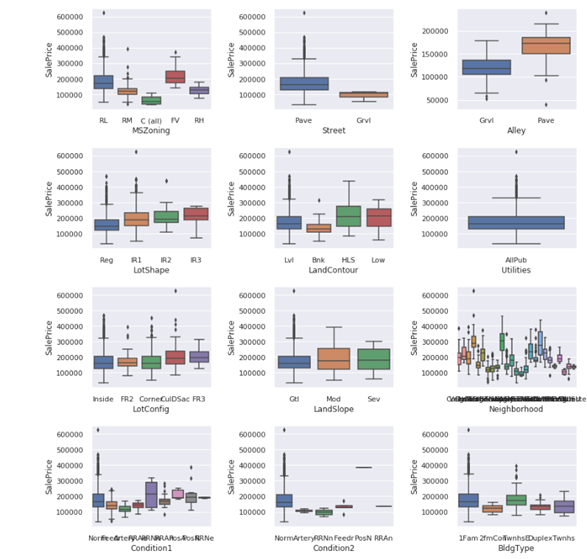

<font size="5">
바이올릿 플롯(Violin Plot)그려보기  <br>
각 독립변수의 범주들과 종속변수 관계 살펴보기


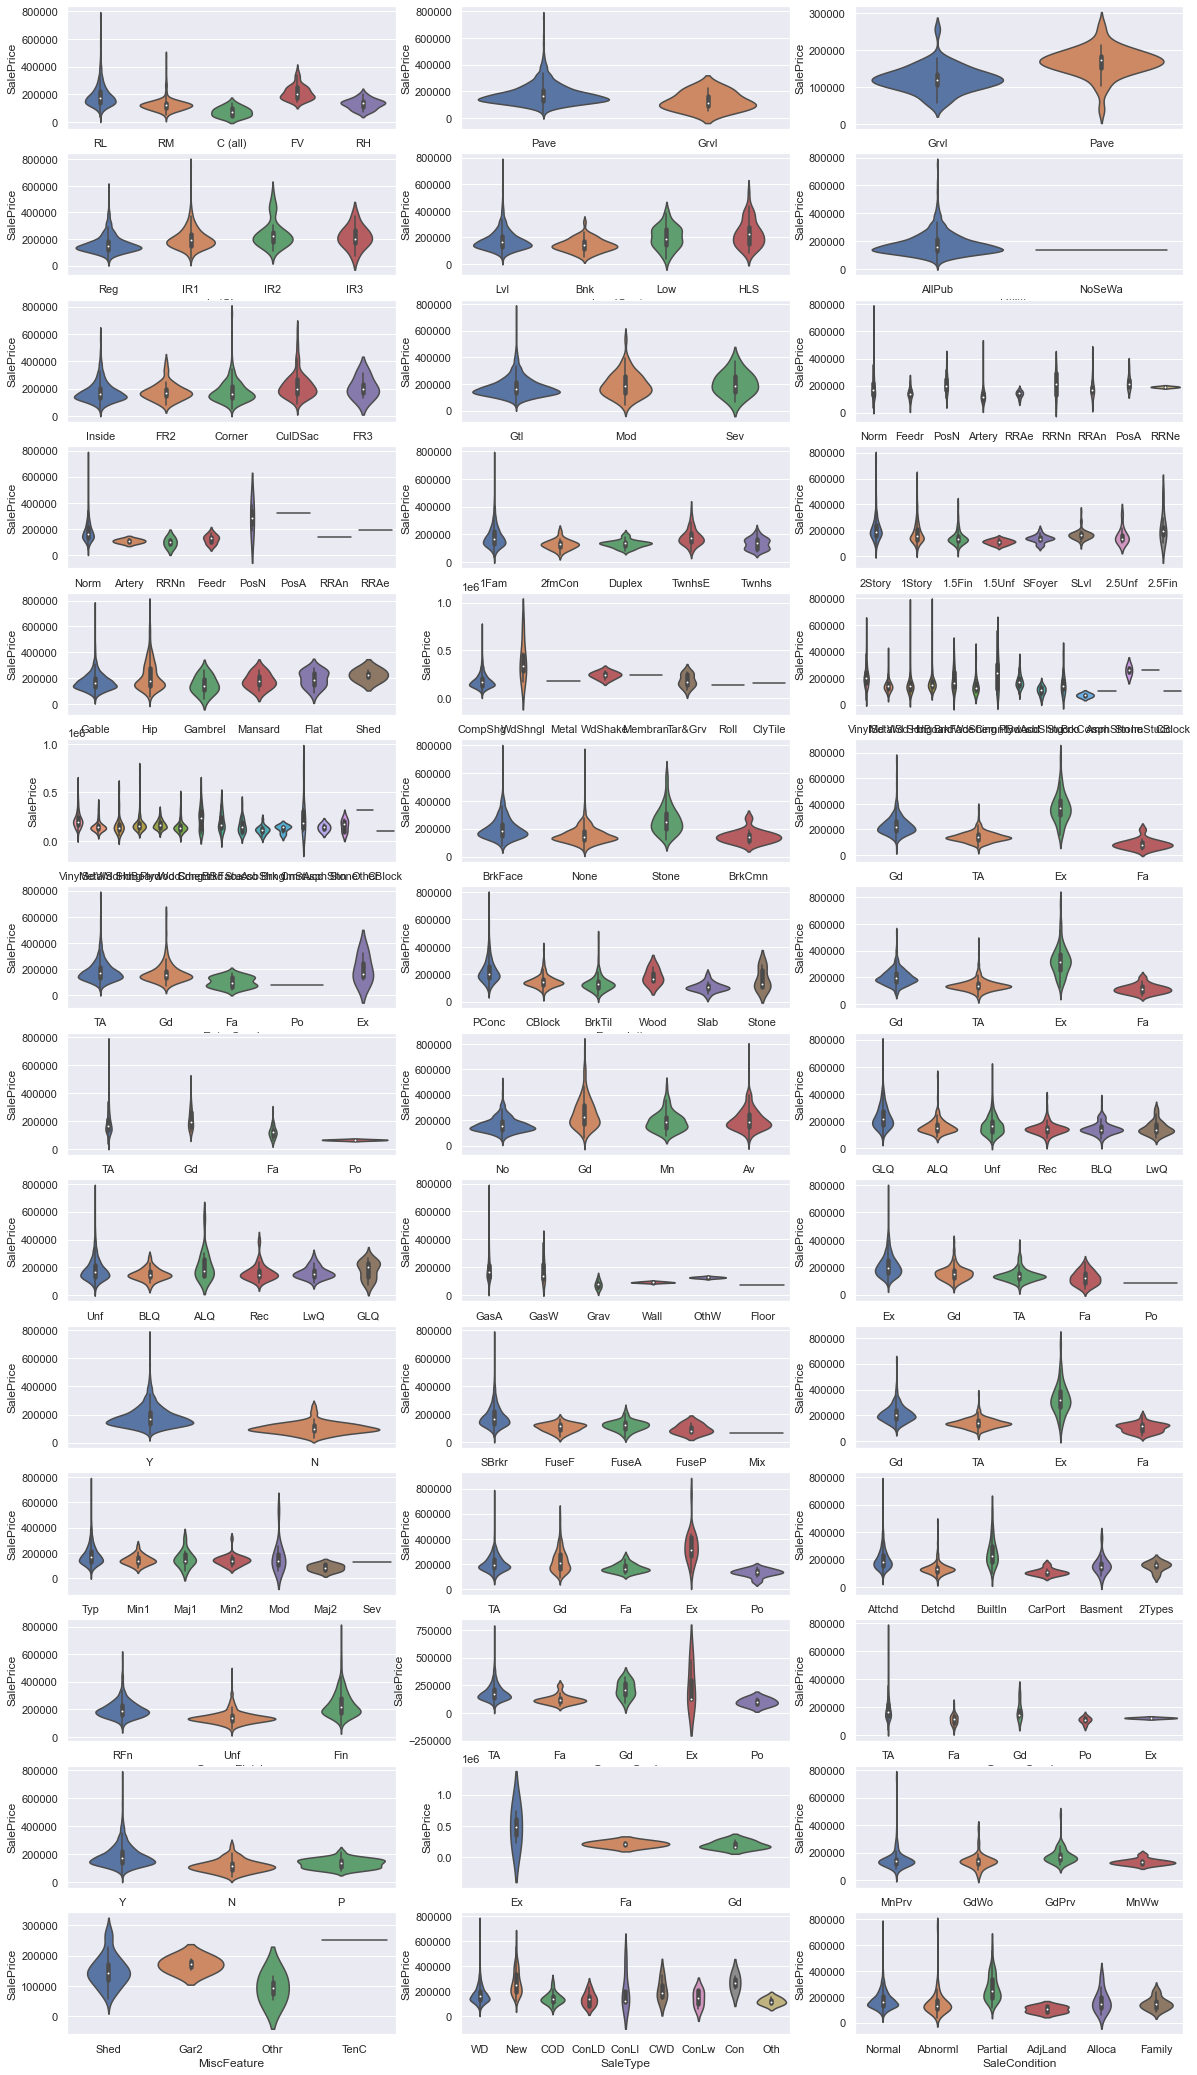

In [90]:
catg_list = category_feature.copy()
catg_list.remove('Neighborhood')

n =1
plt.figure(figsize=(20,40)) # 먼저 창을 만들고
for catg in catg_list:
    ax = plt.subplot(15,3,n)
    sns.violinplot(x=catg, y=df_train["SalePrice"], data=df_train)
    n += 1
    
# plt.tight_layout()
plt.show()    

## 8.변수간 상관관계 히트맵

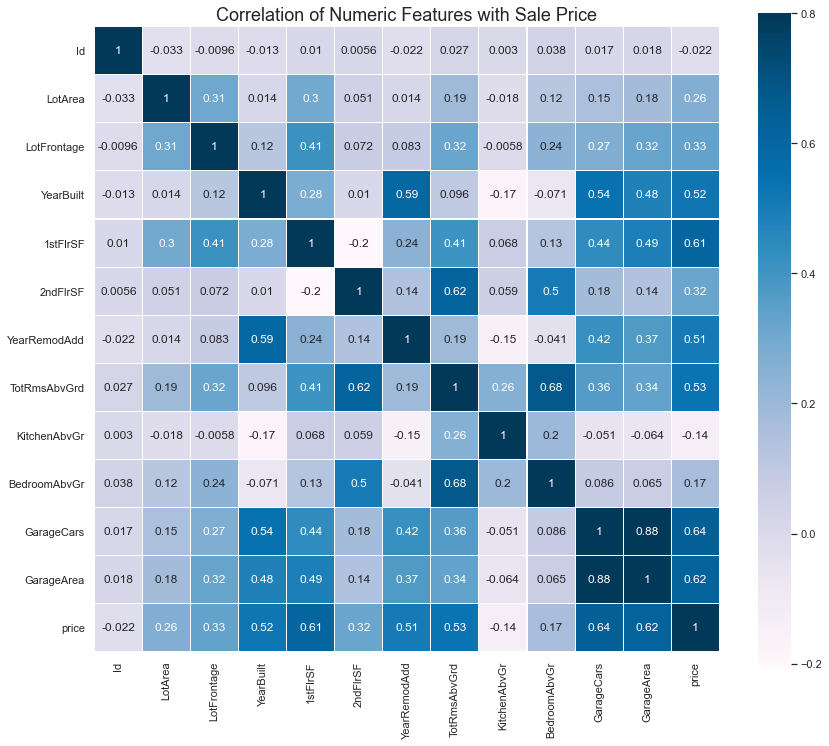

In [137]:
colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=18)
sns.heatmap(data.corr(),square = True, linewidths = 0.1,
            cmap = colormap, linecolor = "white", vmax=0.8,annot=True)
plt.show()

Heat Map은 seaborn 덕분에 직관적으로 이해가 가능하여 변수 간 상관관계에 대하여 쉽게 알 수 있습니다.

또한 변수 간 다중 공선성을 감지하는 데 유용합니다. 

대각선 열을 제외한 박스 중 가장 진한 파란색을 띄는 박스가 보이는데요. 

'GarageArea'와 'GarageCars'의 관계입니다. 

두 경우 모두 변수 사이의 상관 관계가 너무 강하여 다중 공선성(MultiColarisity) 상황이 나타날 수 있습니다.

변수가 거의 동일한 정보를 제공하므로 다중 공선성이 실제로 발생한다는 결론을 내릴 수 있습니다

또 중요한 price와 상관관계정보입니다. 

<font size="5">컬럼수가 많을 경우 상관계수값이 큰 순으로 해서 히트맵 표시</font>

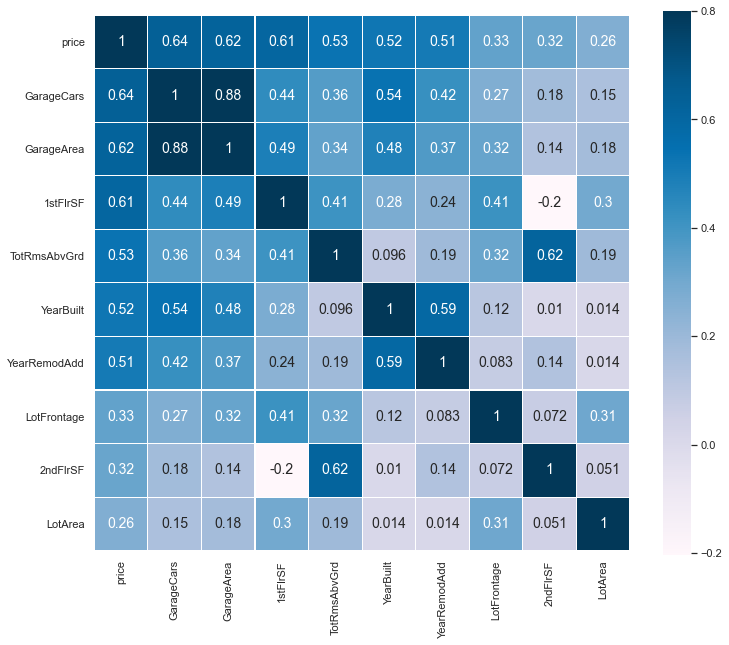

In [127]:
cols = data.corr().nlargest(10,'price')['price'].index
cm = np.corrcoef(data[cols].values.T)

f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':14},yticklabels = cols.values)

plt.show()

가장 눈에 띄는 GarageCars와 GarageArea 서로 밀접하게 연관되어 있음을 알 수 있습니다. 
유사한 정보를 포함하고 있으며 다중공선성이 나타난다고 할 수 있습니다.

Target feature와 가장 밀접한 연관이 있는 feature는 GarageCars, GarageArea ,1stFlrSF로 보인다.   

Price 와 더 연관이 있는 GarageCars만 남기고 GarageArea는 버리도록 ... 


### Feature 별 분포 확인 및 종속변수와 관계 확인

['TotRmsAbvGrd', '1stFlrSF', 'LotFrontage', 'KitchenAbvGr', '2ndFlrSF', 'YearRemodAdd', 'LotArea', 'BedroomAbvGr', 'GarageArea', 'GarageCars', 'YearBuilt']


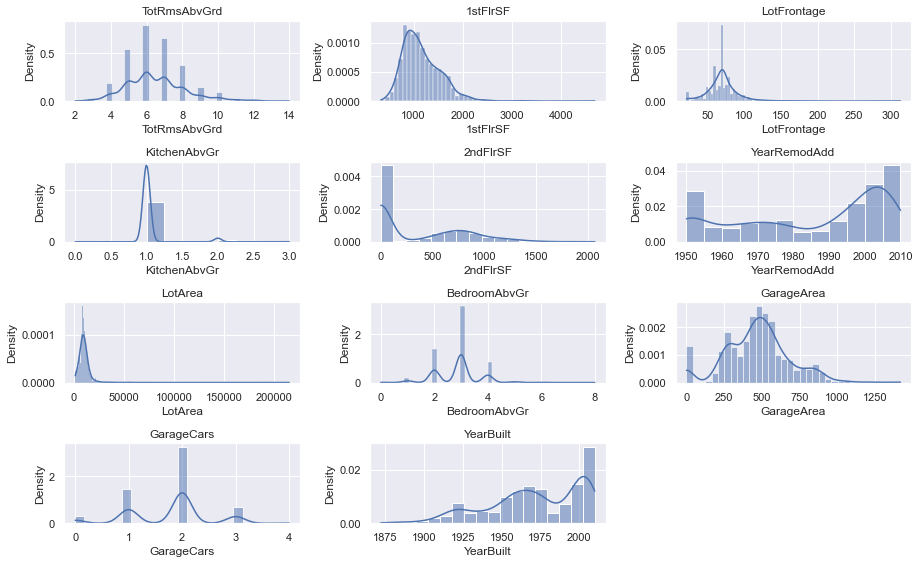

In [147]:
category_feature = [ col for col in data.columns if data[col].dtypes == "object"]
numerical_feature = list(set(data.columns) - set(category_feature) - set(['Id','price']))
print(numerical_feature)

n = 1

plt.figure(figsize=(13,8)) # 먼저 창을 만들고
for col in numerical_feature:
    ax = plt.subplot(4,3,n)
    sns.histplot(data.loc[data[col].notnull(), col],kde=True,stat="density")
    plt.title(col)
    n += 1
    
plt.tight_layout()  # 창 크기에 맞게 조정         
plt.show()

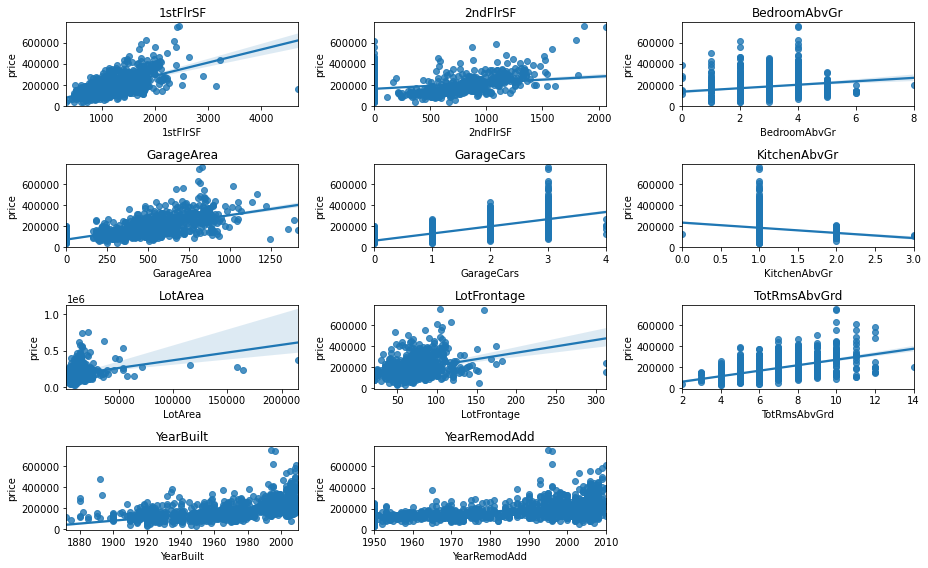

In [56]:
n = 1
plt.figure(figsize=(13,8)) # 먼저 창을 만들고
for col in numerical_feature:
    ax = plt.subplot(4,3,n)    
    sns.regplot(x=col , y='price',data=data )
    plt.title(col)
    n += 1
    
plt.tight_layout()  # 창 크기에 맞게 조정         
plt.show()

마지막으로 pairplot를 시각화  
비슷한 맥락이지만 price와  연관성이 높은 변수와의 관계를 알아보기 위해서 시각화

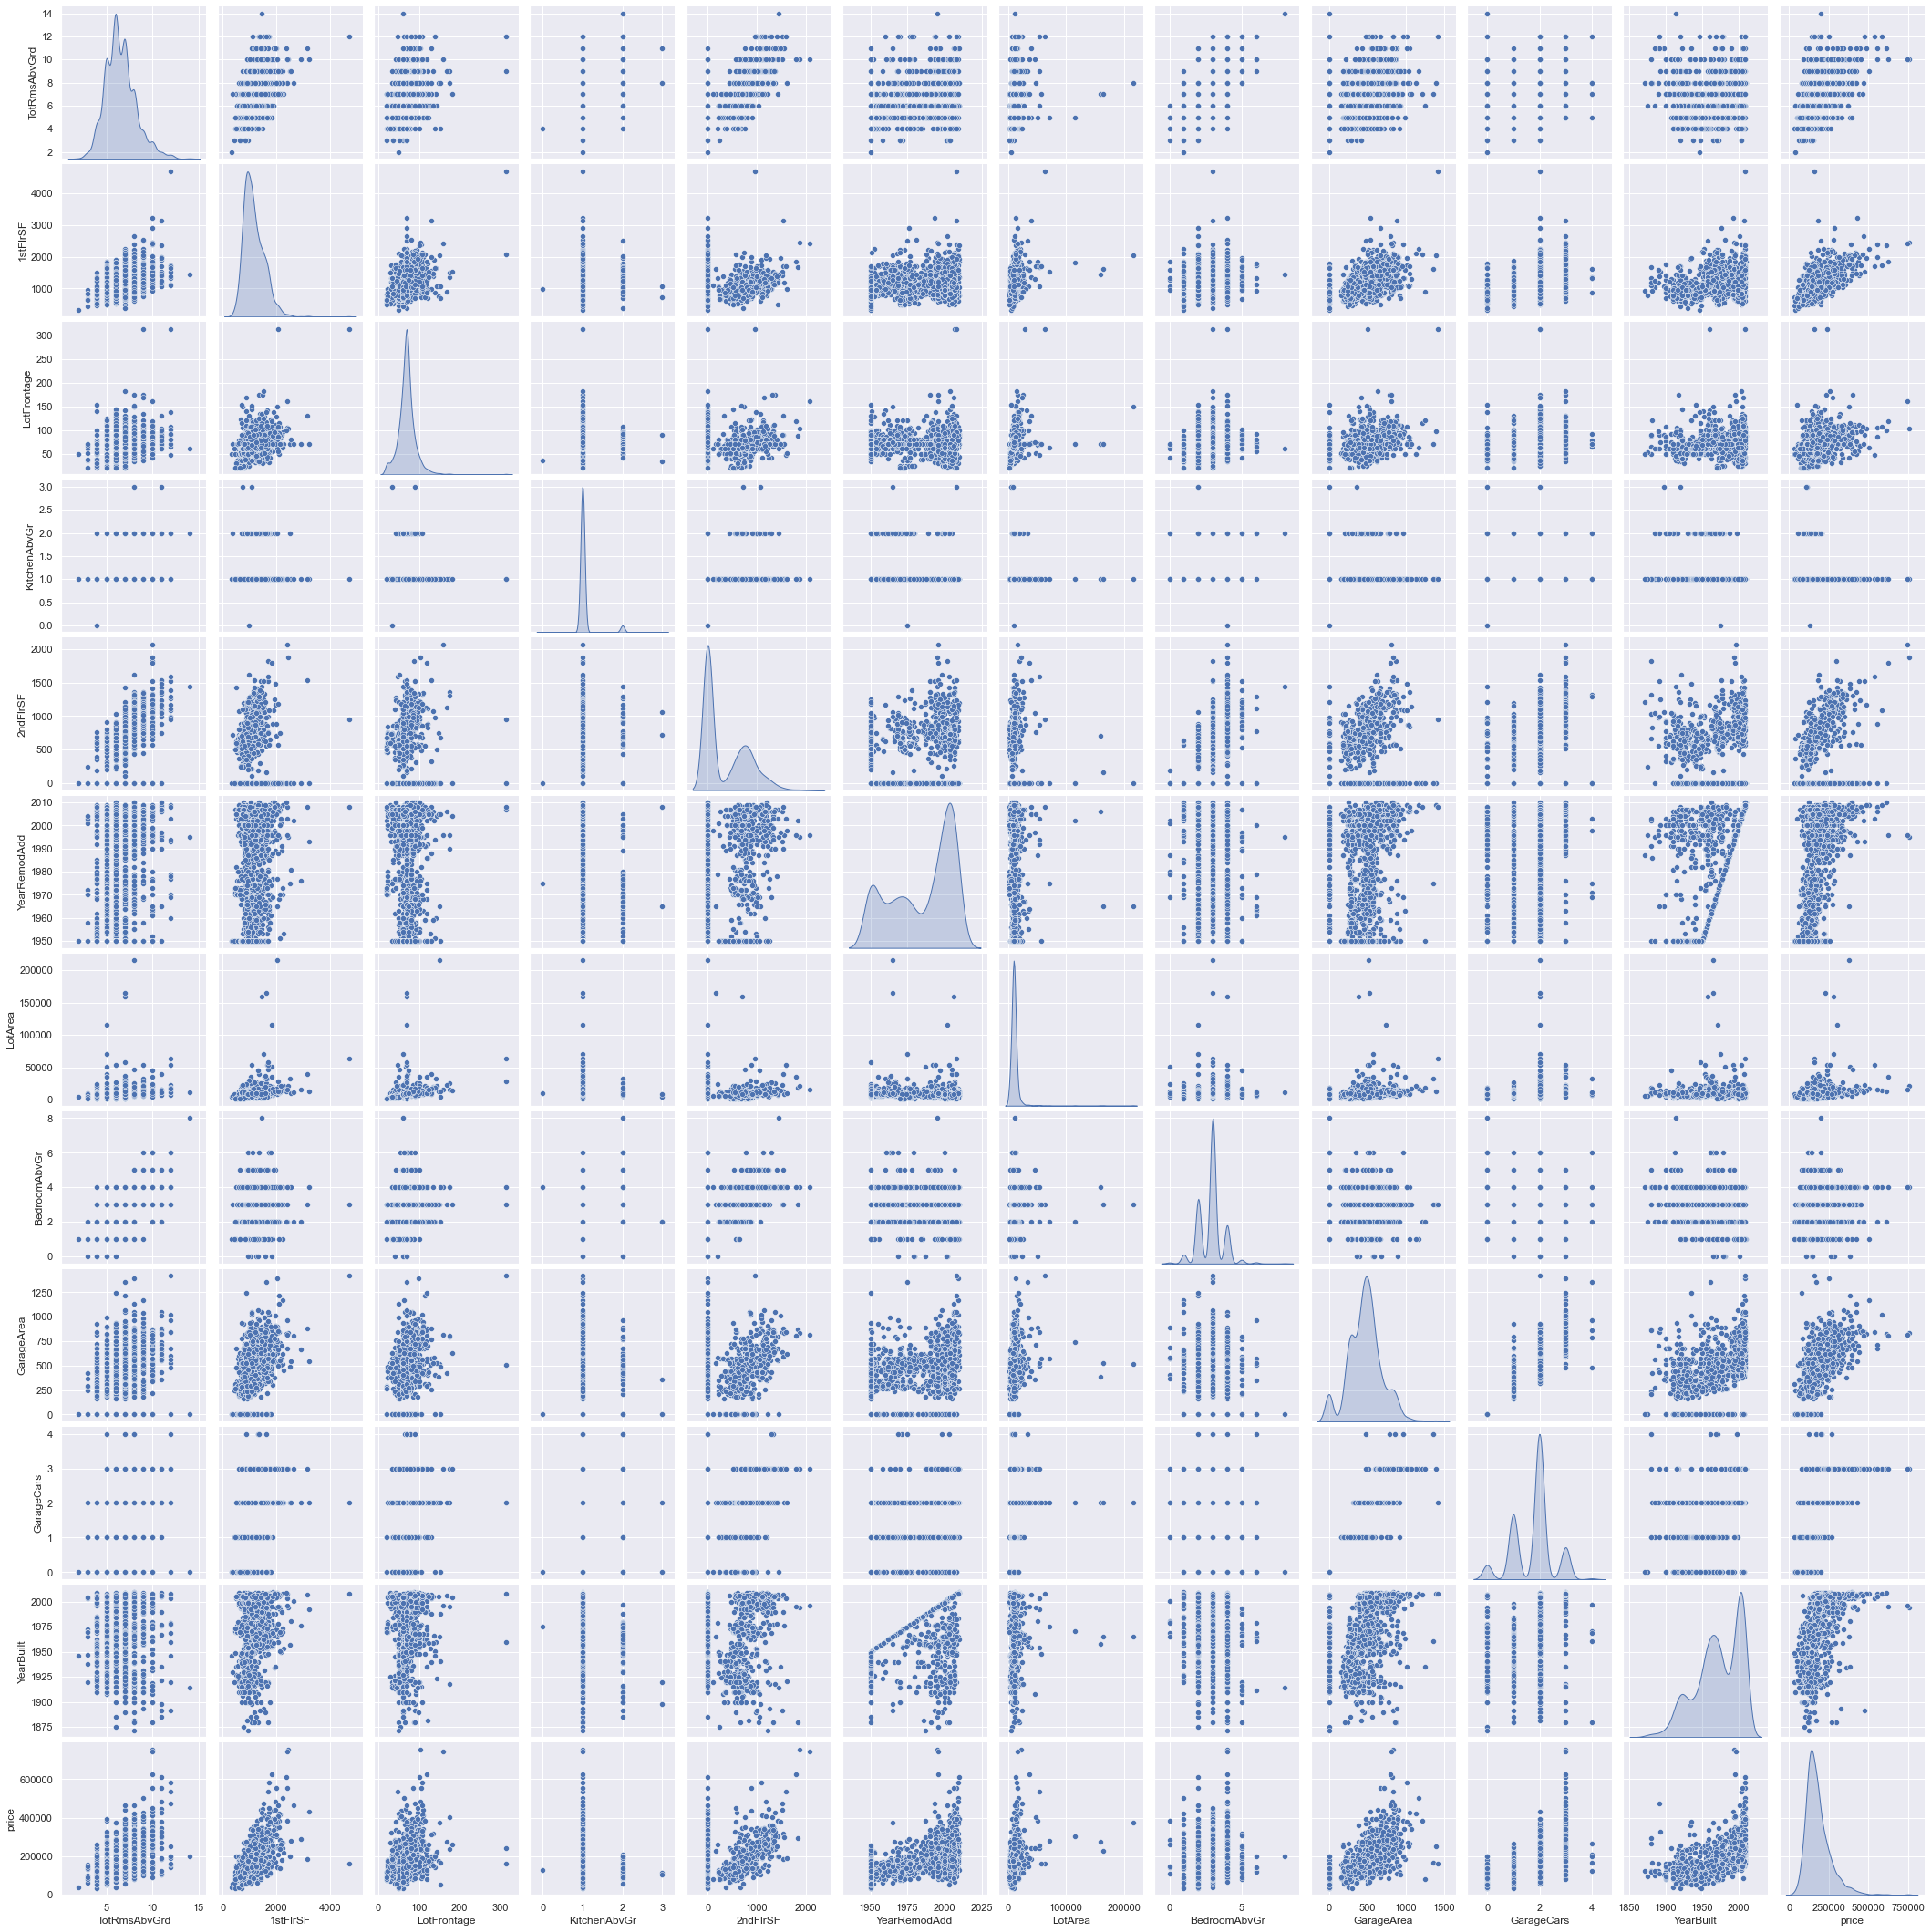

In [151]:
sns.pairplot(data[numerical_feature + ['price']],kind ='scatter',diag_kind='kde') 
plt.show()

## 9. 왜도 첨도 확인
### 왜도

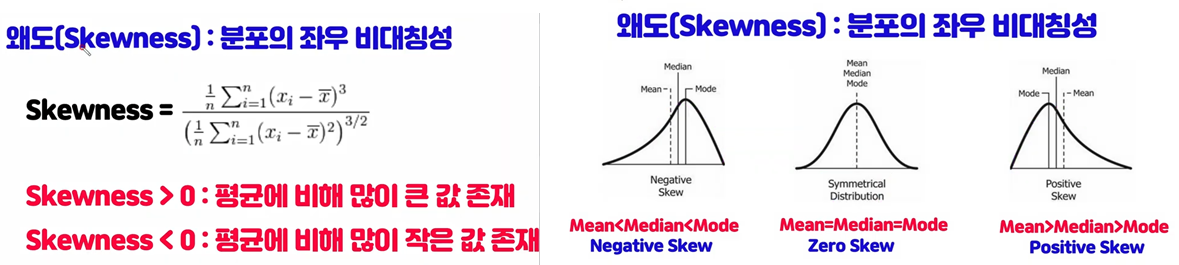

### 첨도 

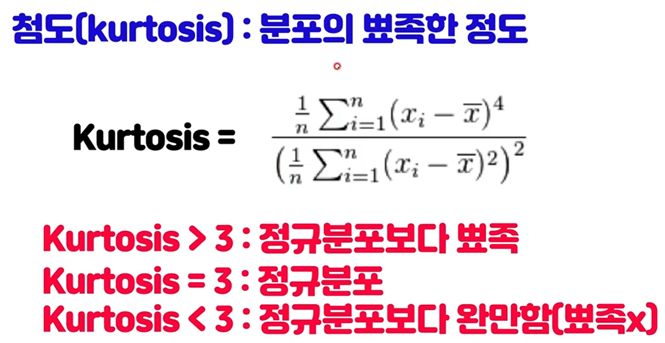

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % cars['Price'].skew())
print("Kurtosis: %f" % cars['Price'].kurt())

# 데이터 스케일링
데이터를 모델링하기 전에는 반드시 스케일링 과정을 거쳐야 한다. 스케일링을 통해 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지 하고, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상 시킨다. 특히 k-means 등 거리 기반의 모델에서는 스케일링이 매우 중요하다  
변수의 크기가 너무 작거나 크면 해당 변수가 Target에 미치는 영향력이 제대로 표현되지 않을 수 있다  
예를 들어, X1 특성은 0부터 1사이의 소수값을 갖는다 비해, X2 특성은 1000000부터 1000000000000사이의 소수값을 갖는 상황에서 y 값은 1000000부터 100000000까지의 값을 갖는 다고 가정하면, 사실 X1 특성은 y를 예측하는데 큰 영향을 주지 않는 것으로 생각할 수 있습니다.(이 외에도 overflow, underflow, 발산 수렴 등의 문제가 있습니다.) 때문에 이런 상태에서는 머신러닝이 잘 작동하지 않게 됩니다. 

## 스케일링 종류
1. StandardScaler  
각 특성의 평균을 0, 분산을 1로 스케일링합니다. 즉 데이터를 정규분포로 만듭니다. 하한값과 상한값이 존재하지 않을 수 있기에, 어떤 알고리즘에서는 문제가 있을 수 있습니다. 회귀보다 분류에 유용합니다.  
그러나 이상치가 있다면 평균과 표준편차에 영향을 미쳐 변환된 데이터의 확산은 매우 달라지게 된다. 따라서 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없다.
2. RobustScaler  
각 특성들의 중앙값을 0, IQR(제3사분위수-제1사분위수,Q3-Q1)을 1로 스케일링합니다. StandardScaler와 비슷하지만, 이상치의 영향을 최소화합니다.   
중앙값(median)과 IQR(interquartile range)을 사용하기 때문에 StandardScaler와 비교해보면 표준화 후 동일한 값을 더 넓게 분포 시키고 있음을 확인 할 수 있다.
3. MinMaxScaler(a,b)  
각 특성의 하한값을 a, 상한값을 b로 스케일링합니다. a=0, b=1일 경우 Normalization으로 표기할 때도 있습니다. 분류보다 회귀에 유용합니다.  다만 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축될 수 있다.
4. MaxAbsScaler  
각 특성을 절대값이 0과 1사이가 되도록 스케일링합니다. 즉, 모든 값은 -1과 1사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler와 같습니다. 큰 이상치에 민감할 수 있다.
5. Normalizer  
앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용하여 진행됩니다. 그러나 Normalizer의 경우 각 샘플(행)마다 적용되는 방식입니다. 이는 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링합니다. 일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라, 모델(특히나 딥러닝) 내 학습 벡터에 적용하며, 특히나 피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않습니다. 

## StandardScaler & RobustScaler
이상치 값이 있을 경우 이상치, 특이값에 덜 민감한" 중앙값(median)과 IQR(Inter-Quartile Range)을 이용해서 척도를 표준화하는 방법입니다.  
(1) StandardScaler() method를 이용한 표준정규분포로의 표준화 ((x-mean)/std )와 (2) RobustScaler() method를 이용한 표준화 ( (x-median)/IQR )를 비교 설명

### StandardScaler

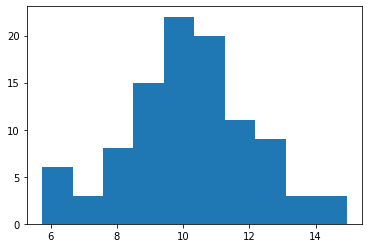

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=2)
np.random.seed(10)
mu, sigma = 10, 2
x = mu + sigma*np.random.randn(100)
plt.hist(x)
plt.show()

10.158833325873747 1.9340789542274115
11.981383595820532 12.714552555982538


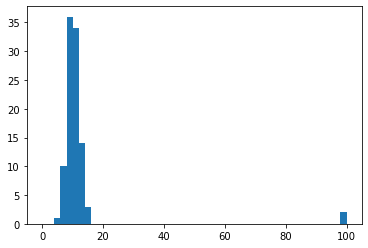

In [20]:
print(np.mean(x) , np.std(x) )

# inserting outliers
x[98:100] = 100

print(np.mean(x) , np.std(x) )
plt.hist(x, bins=np.arange(0, 102, 2))
plt.show()

5.329070518200751e-17 1.0


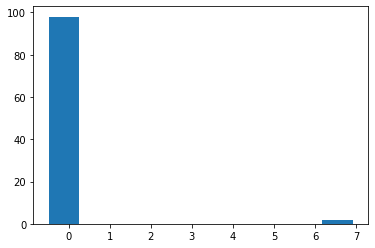

In [26]:
x = x.reshape(-1,1)
x_StandardScaler = StandardScaler().fit_transform(x)

print(np.mean(x_StandardScaler), np.std(x_StandardScaler) )
plt.hist(x_StandardScaler)
plt.show()

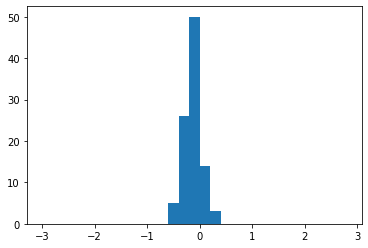

In [28]:
x_StandardScaler_zoonin = x_StandardScaler[x_StandardScaler < 5]
plt.hist(x_StandardScaler_zoonin, bins=np.arange(-3.0, 3.0, 0.2))
plt.show()

### RobustScaler

In [32]:
print(np.median(x))
Q1 = np.percentile(x, 25, axis=0)
Q3 = np.percentile(x, 75, axis=0)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)

10.207697741550213
[9.04] [11.42]
[2.37]


mean 0.0
std 5.356926208238648


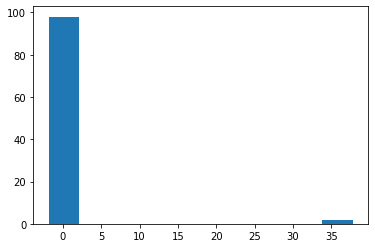

In [37]:
x_RobustScaler = RobustScaler().fit_transform(x)
print("mean" , np.median(x_RobustScaler))
print("std" , np.std(x_RobustScaler))
plt.hist(x_RobustScaler)
plt.show()

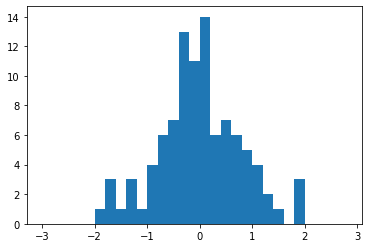

In [38]:
x_RobustScaler_zoonin = x_RobustScaler[x_RobustScaler < 5]
plt.hist(x_RobustScaler_zoonin, bins=np.arange(-3, 3, 0.2))
plt.show()

두 개의 히스토그램은 이상치, 특이값(outlier)이 포함되어 있는 데이터를 표준화하는 경우에 (1) 평균과 표준편차를 이용한 표준정규분포 표준화 결과 (outlier 미포함한 범위의 zoom in)와, (2) 중앙값과 IQR(Interquartile Range)를 이용한 이상치에 견고한 표준화 (outlier 미포함한 범위의 zoom in) 결과의 분포를 나타내고 있다.  
왼쪽의 StandardScaler()에 의한 표준화보다 오른쪽의 RobustScaler()에 의한 표준화가 동일한 값을 더 넓게 분포시키고 있음을 알 수 있습니다.  즉, 목표변수 y값을 분류나 예측하는데 있어 산포가 더 크기 때문에 설명변수 x변수로서 더 유용할 수 있다고 추정할 수 있습니다  
결론적으로 모든 스케일러 처리 전에는 아웃라이어 제거가 선행되어야 한다. 또한 데이터의 분포 특징에 따라 적절한 스케일러를 적용해주는 것이 좋다.

## 데이터 분포별 스케일 변환 결과

In [39]:
import numpy as np
# numpy float 출력옵션 변경
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

import pandas as pd

import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('ggplot')
%matplotlib inline

# 랜덤에 의해 똑같은 결과를 재현하도록 seed값 고정
seed = 777
np.random.seed(seed)

def scale(train_data, scatter_show_YN=False, kdeplot_show_YN=False):    
    from sklearn.preprocessing import MinMaxScaler
    minMaxScaler = MinMaxScaler()
    %time print(minMaxScaler.fit(train_data))
    train_data_minMaxScaled =  pd.DataFrame(minMaxScaler.transform(train_data), columns=['x1', 'x2'])

    from sklearn.preprocessing import MaxAbsScaler
    maxAbsScaler = MaxAbsScaler()
    %time print(maxAbsScaler.fit(train_data))
    train_data_maxAbsScaled = pd.DataFrame(maxAbsScaler.transform(train_data), columns=['x1', 'x2'])

    from sklearn.preprocessing import StandardScaler
    standardScaler = StandardScaler()
    %time print(standardScaler.fit(train_data))
    train_data_standardScaled = pd.DataFrame(standardScaler.transform(train_data), columns=['x1', 'x2'])

    from sklearn.preprocessing import RobustScaler
    robustScaler = RobustScaler()
    %time print(robustScaler.fit(train_data))
    train_data_robustScaled = pd.DataFrame(robustScaler.transform(train_data), columns=['x1', 'x2'])

    if(kdeplot_show_YN is True):
        kdeplot_show(train_data, train_data_minMaxScaled, train_data_maxAbsScaled, train_data_standardScaled, train_data_robustScaled)    
    
    if(scatter_show_YN is True):
        scatter_show(train_data, train_data_minMaxScaled, train_data_maxAbsScaled, train_data_standardScaled, train_data_robustScaled)

def scatter_show(train_data, train_data_minMaxScaled, train_data_maxAbsScaled, train_data_standardScaled, train_data_robustScaled):    
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(19,4))
    scatter_sub_draw(sub_ax=ax[0], x=train_data['x1'], y=train_data['x2'],
                                  title='train_data', size=2, color1='k', color2='c')
    scatter_sub_draw(sub_ax=ax[1], x=train_data_minMaxScaled['x1'], y=train_data_minMaxScaled['x2'],
                                  title='train_data_minMaxScaled', size=2, color1='g', color2='c')
    scatter_sub_draw(sub_ax=ax[2], x=train_data_maxAbsScaled['x1'], y=train_data_maxAbsScaled['x2'],
                                  title='train_data_maxAbsScaled', size=2, color1='g', color2='c')
    scatter_sub_draw(sub_ax=ax[3], x=train_data_standardScaled['x1'], y=train_data_standardScaled['x2'],
                                  title='train_data_standardScaled', size=2, color1='g', color2='c')
    scatter_sub_draw(sub_ax=ax[4], x=train_data_robustScaled['x1'], y=train_data_robustScaled['x2'],
                                  title='train_data_robustScaled', size=2, color1='g', color2='c')
    
def scatter_sub_draw(sub_ax, x, y, title, size, color1, color2):
    sub_ax.scatter(x, y, s=size, color=color1)
    sub_ax.grid(True)
    sub_ax.set_title(title)
    sub_ax.set_xlabel(x.name)
    sub_ax.set_ylabel(y.name)
    # median  line draw
    sub_ax.axvline(x=x.median(), color=color2, linestyle='--', linewidth=0.5)
    sub_ax.axhline(y=y.median(), color=color2, linestyle='--', linewidth=0.5)

def kdeplot_show(train_data, train_data_minMaxScaled, train_data_maxAbsScaled, train_data_standardScaled, train_data_robustScaled):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(19,4))
    kdeplot_sub_draw(sub_ax=ax[0], x=train_data['x1'], y=train_data['x2'], 
                                  title='train_data', size=1, color1='r', color2='b')
    kdeplot_sub_draw(sub_ax=ax[1], x=train_data_minMaxScaled['x1'], y=train_data_minMaxScaled['x2'], 
                                  title='train_data_minMaxScaled', size=1, color1='r', color2='b')
    kdeplot_sub_draw(sub_ax=ax[2], x=train_data_maxAbsScaled['x1'], y=train_data_maxAbsScaled['x2'], 
                                  title='train_data_maxAbsScaled', size=1, color1='r', color2='b')
    kdeplot_sub_draw(sub_ax=ax[3], x=train_data_standardScaled['x1'], y=train_data_standardScaled['x2'], 
                                  title='train_data_standardScaled', size=1, color1='r', color2='b')
    kdeplot_sub_draw(sub_ax=ax[4], x=train_data_robustScaled['x1'], y=train_data_robustScaled['x2'], 
                                  title='train_data_robustScaled', size=1, color1='r', color2='b')
    
def kdeplot_sub_draw(sub_ax, x, y, title, size, color1, color2):
    # sns.kdeplot: Fit and plot a univariate or bivariate kernel density estimate
    import seaborn as sns
    sub_ax.grid(True)
    sub_ax.set_title(title)
    sns.kdeplot(x, ax=sub_ax, shade=True, color=color1)
    sns.kdeplot(y, ax=sub_ax, shade=True, color=color2)
    # median  line draw
    sub_ax.axvline(x=x.median(), color=color1, linestyle='--', linewidth=0.5)
    sub_ax.axvline(x=y.median(), color=color2, linestyle='--', linewidth=0.5)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [42]:
train_data = pd.DataFrame({
    'x1': np.random.randint(-100, 0, 10000).astype(float),
    'x2': np.random.randint(0, 500, 10000).astype(float)
})
train_data.describe()

x1            x2
count  10000.000000  10000.000000
mean     -50.770300    247.723900
std       28.724767    145.521925
min     -100.000000      0.000000
25%      -76.000000    120.000000
50%      -51.000000    248.000000
75%      -26.000000    375.000000
max       -1.000000    499.000000

MinMaxScaler()
Wall time: 2.99 ms
MaxAbsScaler()
Wall time: 2.01 ms
StandardScaler()
Wall time: 1.96 ms
RobustScaler()
Wall time: 1.97 ms


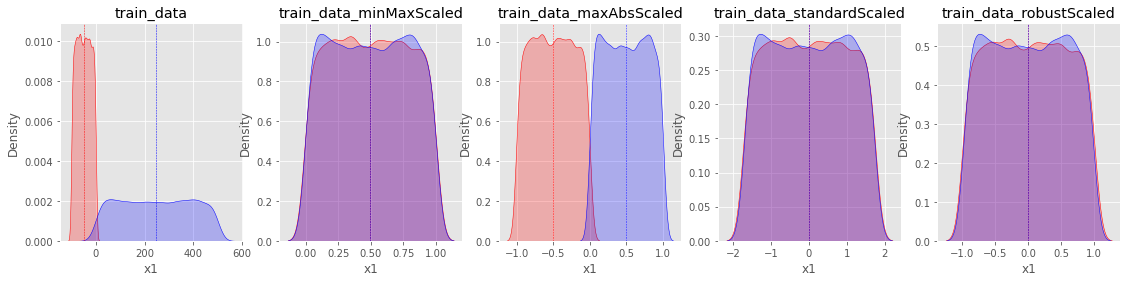

In [43]:
scale(train_data, scatter_show_YN=False, kdeplot_show_YN=True)

In [45]:
train_data = pd.DataFrame({
    'x1': np.random.normal(-50, 10, 10000),
    'x2': np.random.normal(50, 50, 10000),
})
train_data.describe()

x1            x2
count  10000.000000  10000.000000
mean     -49.975366     50.402890
std       10.042289     49.774555
min      -88.857257   -151.387644
25%      -56.740153     17.004754
50%      -49.971409     50.351580
75%      -43.231642     84.192814
max       -7.691192    275.590305

MinMaxScaler()
Wall time: 997 µs
MaxAbsScaler()
Wall time: 997 µs
StandardScaler()
Wall time: 1.99 ms
RobustScaler()
Wall time: 2.99 ms


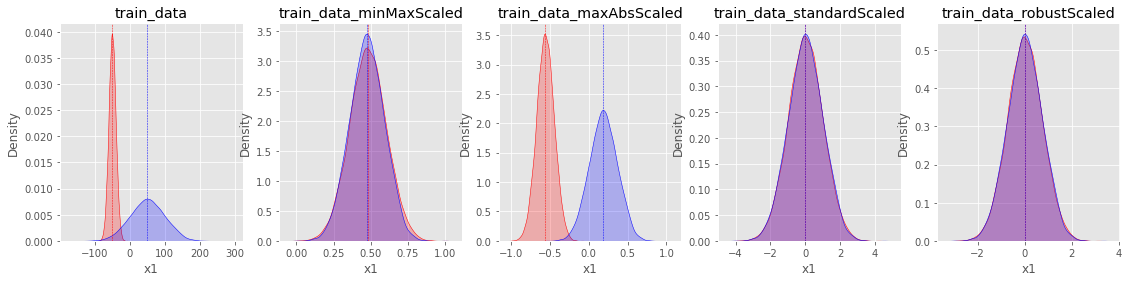

In [46]:
scale(train_data, scatter_show_YN=False, kdeplot_show_YN=True)

In [47]:
train_data = pd.DataFrame({
    'x1': np.random.chisquare(5, 10000) - 20.0,
    'x2': (np.random.chisquare(10, 10000) * -1) + 20.0
})
train_data.describe()

x1            x2
count  10000.000000  10000.000000
mean     -14.964784     10.069328
std        3.145353      4.427041
min      -19.963833    -14.706909
25%      -17.272337      7.503094
50%      -15.641971     10.756079
75%      -13.324966     13.300269
max        5.835637     19.380385

MinMaxScaler()
Wall time: 1.99 ms
MaxAbsScaler()
Wall time: 2.02 ms
StandardScaler()
Wall time: 2.02 ms
RobustScaler()
Wall time: 2.02 ms


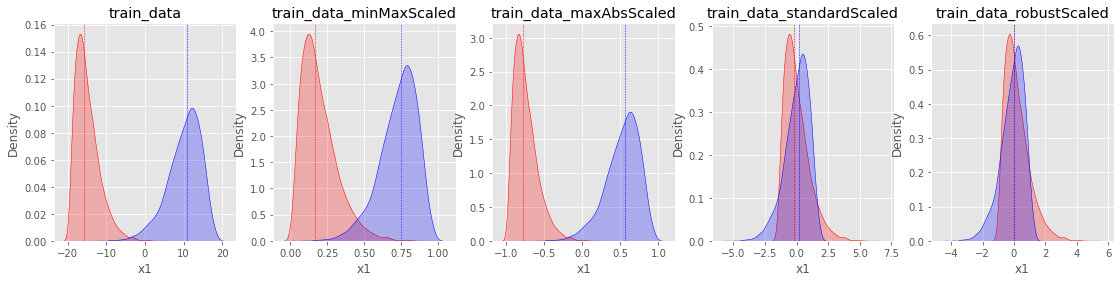

In [48]:
scale(train_data, scatter_show_YN=False, kdeplot_show_YN=True)

In [49]:
train_data = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 1, 9000), np.random.normal(40, 1, 1000)]),
    'x2': np.concatenate([np.random.normal(30, 2, 9000), np.random.normal(10, 4, 1000)])
})
train_data.describe()

x1            x2
count  10000.000000  10000.000000
mean      22.000033     27.980371
std        6.097714      6.423888
min       15.945967     -3.457239
25%       19.395967     28.061204
50%       20.139985     29.728068
75%       20.974022     31.152184
max       43.410867     37.419449

MinMaxScaler()
Wall time: 2 ms
MaxAbsScaler()
Wall time: 998 µs
StandardScaler()
Wall time: 1.98 ms
RobustScaler()
Wall time: 3.02 ms


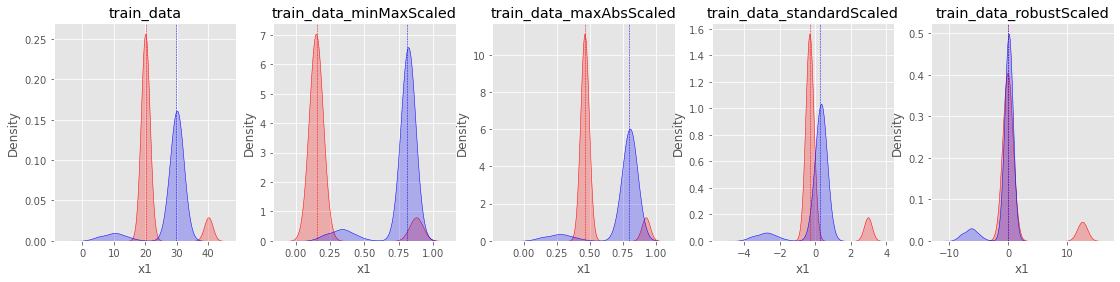

In [50]:
scale(train_data, scatter_show_YN=False, kdeplot_show_YN=True)

In [51]:
train_data = pd.DataFrame({
    'x1': np.concatenate([np.array([0] * 100), np.array([0] * 100), np.array([1] * 600), np.array([1] * 200)]),
    'x2': np.concatenate([np.array([0] * 100), np.array([1] * 100), np.array([0] * 700), np.array([1] * 100)])
})
train_data.describe()

x1         x2
count  1000.0000  1000.0000
mean      0.8000     0.2000
std       0.4002     0.4002
min       0.0000     0.0000
25%       1.0000     0.0000
50%       1.0000     0.0000
75%       1.0000     0.0000
max       1.0000     1.0000

MinMaxScaler()
Wall time: 1.99 ms
MaxAbsScaler()
Wall time: 1.99 ms
StandardScaler()
Wall time: 1.99 ms
RobustScaler()
Wall time: 2.99 ms


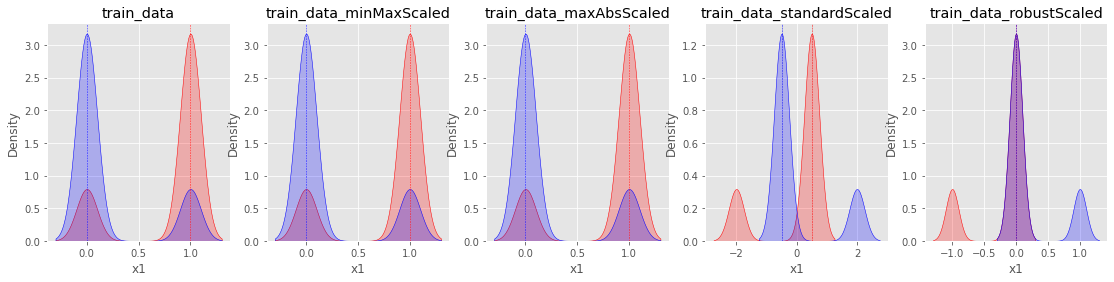

In [52]:
scale(train_data, scatter_show_YN=False, kdeplot_show_YN=True)

변환 분포를 살펴보면 StandardScaler와 RobustScaler의 변환된 결과가 대부분 표준화된 유사 형태의 데이터 분포로 반환된다. MinMaxScaler특정값에 집중되어 있는 데이터가 그렇지 않은 데이터 분포보다 1표준편차에 의한 스케일 변화값이 커지게 된다. 한쪽으로 쏠림 현상이 있는 데이터 분포는 형태가 거의 유지된채 범위값이 조절되는 결과를 보인다.

MaxAbsScaler의 경우, MinMaxScaler와 유사하나 음수와 양수값에 따른 대칭 분포를 유지하게 되는 특징이 있다.
그리고 마지막 이미지를 통해 살펴보면, 대부분의 스케일링 기법에서 아웃라이어는 변환 효과를 저해하는 요소임이 드러난다.
유의해야할 점은, 스케일링시 Feature별로 크기를 유사하게 만드는 것은 중요하지만, 그렇다고 모든 Feature의 분포를 동일하게 만들 필요는 없다.

# One-Hot encoding
범주형 변수 원핫 인코딩 변환

1. pandas.get_dummies  
- pandas.get_dummies는 train 데이터의 특성을 학습하지 않기 때문에 train 데이터에만 있고 test 데이터에는 없는 카테고리를 test 데이터에서 원핫인코딩 된 칼럼으로 바꿔주지 않는다.  
- 그리고 피처에 null 값이 있다면 자동으로 제외를 시켜서 예를드면 0,0,0,0 으로 셋팅한다.  
- 자동으로 문자형 변수만 원핫 인코딩 해준다.

2. sklearn.preprocessing.OneHotEncoder
- train 데이터의 특성을 학습 할 수가 있어서, test 데이터에 특성을 적용할 수 가 있다.
- 단점은 문자형 변수를 지정해줘야 함..
- 결과 값이 numpy.array이기 때문에 데이트 프레임으로 변한 활때 작업이 들어간다. 
- train에는 없지만 test 에 있을때는 기본 오류가 난다. handle_unknown='ignore' 지정하면 무시 한다. 값을 0,0,0,0 으로 들어간다.

3. category_encoders.OneHotEncoder  
sklearn에 있는OneHotEncoder는 category 이름이 사라짐   
category_encoders.OneHotEncoder는 안사라짐

그리고 둘다 null 값은 nan이는 피처에 값이 들어간다. 앞에서 널처리를 했다면 문제가 없지만...
null 처리를 안하고 원핫 인코딩을 했다면 좀 주의있게 사용하자..

<font size="5"> 원핫 인코딩이 가볍게 쓸수 있지만 조심하자..</font>

<font size="5">sklearn.preprocessing.OneHotEncoder 을 이용한 인코딩</font>  
sklearn는 범주 이름이 사라지기 때문에 별도로 처리 로직이 들어간다.. .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('./house_price_train.csv')
df_test = pd.read_csv('./house_price_test.csv')

category_feature = [ col for col in df_train.columns if df_train[col].dtypes == "object"]
numerical_feature = list(set(df_train.columns) - set(category_feature) - set(['Id']))

'''
데이터 가공을 많이 수행할 예정이므로 원본 복사해서 가공
'''
df_train_org = df_train.copy()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
df_train_ohe = ohe.fit_transform(df_train[category_feature])

ohe_columns =[]
for index, val in enumerate(category_feature):
    for col in ohe.categories_[index]:
        ohe_columns.append(val+'_' + str(col))

df_train_ohe_df = pd.DataFrame(df_train_ohe, columns = ohe_columns ) 
df_train_ohe_df = pd.concat([df_train.drop(category_feature,axis=1), df_train_ohe_df], axis =1 )

df_test_ohe  = ohe.transform(df_test[category_feature])
df_test_ohe_df = pd.DataFrame(df_test_ohe, columns = ohe_columns )
df_test_ohe_df = pd.concat([df_test.drop(category_feature,axis=1),df_test_ohe_df], axis =1 )

df_train_ohe_df.shape, df_test_ohe_df.shape

((1460, 306), (1459, 305))

<font size="5">category_encoders.OneHotEncoder 을 이용한 인코딩</font>

In [2]:
import category_encoders as ce   # version 1.2.8
import warnings
warnings.filterwarnings('ignore')
category_feature = [ col for col in df_train.columns if df_train[col].dtypes == "object"]

ce_one_hot = ce.OneHotEncoder(cols=category_feature, use_cat_names=True)
df_train_ohe_df = ce_one_hot.fit_transform(df_train[category_feature])
df_train_ohe_df = pd.concat([df_train.drop(category_feature,axis=1), df_train_ohe_df], axis =1 )
df_train_ohe_df.shape


(1460, 306)

In [3]:
'''
이거는 삭제 해도 그만 안해도 그만인데...
pd.get_dummies 하고 맞추려면 삭제 할수도 있다..
'''
colname = df_train_ohe_df.columns[df_train_ohe_df.columns.str.contains('nan')]
df_train_ohe_df = df_train_ohe_df.drop(colname, axis=1)
df_train_ohe_df.shape

(1460, 290)

# Category, One-Hot encoding이 모델에 미치는 영향 테스트
1. 변주형 변수를 아무 처리 하지않고 그냥 사용
2. 변주형 변수를 category 타입으로 변경해 사용
3. 변주형 변수를 One-Hot encoding 한 후 사용

이 3가지 방법이 모델에 미치는 영향을 테스트 해봅시다.

결론은 별 영향이 없는듯 하다..

참고 사이트 :  
https://mintaewon.github.io/2021/01/studycategory-one-hot-encoding%EC%9D%B4-%EB%AA%A8%EB%8D%B8%EC%97%90-%EB%AF%B8%EC%B9%98%EB%8A%94-%EC%98%81%ED%96%A5-%ED%85%8C%EC%8A%A4%ED%8A%B8/

# 데이터 질을 향상시킬만한 내용 작성
- 범주형 변수가 있는 경우 encoding 필요
- 변수간 크기가 다른 경우 scaling 필요
- 변수가 많은 경우 feature engineering등 